MERLIN tutorial following http://www.black-hole.eu/index.php/schools-workshops-and-conferences/2nd-school-on-multiwavelength-astronomy/course-materials/164-merlin-data


## Overview

This tutorial describes the data reduction for MERLIN 5-GHz radio continuum observations of the radio galaxy 3C277.1. For more information see www.merlin.ac.uk.

These data were taken using 6 antennas, Ca (32 m) and Mk Ta Da Kn De, all 25 m. Their sensitivities vary, with De being by far the least efficient at this frequency. The array contains baselines up to 217 km and a usable bandwidth of 13 MHz which has been combined in one channel, hence the data volumne is small and rapid to process (the e-MERLIN upgrade will provide 2 GHz bandwidth). All antennas are alt-az. All four polarizations (RR RR LR RL) are present. Antenna positions are geocentric, terrestrial E, N positive.

The data can be downloaded from 3C277.1.MULTTB which is a multi-source file containing:

   - 3C277.1 (target)
   - 1300+580 (phase-reference source and polarization leakage calibrator)
   - 3C286 (primary flux scale calibrator and polarization angle calibrator)
   - OQ208 (point source flux scale calibrator)

Two flux scale calibrators are used because sources like 3C286 with stable, well-known amplitudes (and in this case polarization) are usually extended over several arcsec or more and hence are heavily resolved by MERLIN. On the other hand, point-like, bright sources like OQ208 are usually variable.

 
Information: If you want to short-circuit any of the steps, or compare your data (see if you can do better!), 3C277.1.FITS is a multi-source file containing target and calibration sources which has already been (mostly) edited. 3C277.1C.SPLIT contains the fully-edited target with all calibration from calibration sources applied, ready for imaging and self-calibration. 3C277.1.CAL.SPLIT is also fully self-calibrated and 3C277.1.FITSIMAGE is the final image in full polarization. These can be loaded into CASA using importuvfits for the first 3 files and importfits for the image.

The script below covers:

   - Loading and inspecting data
   - Editing
   - Initial phase-calibration of calibration sources
   - Setting the flux scale
   - Time-dependent amplitude calibration of calibration sources
   - Polarization leakage and angle calibration
   - Target imaging and self-calibration
   - Imaging in polarization
   - Image measurements 

In [1]:
import os

In [2]:
casa['build']['version']

'5.4.0-68  '

## Import, inspect and flag the data

This assumes that all data are in the present working directory; if not, use the path in front of the fitsfile name.

Start CASA and set variables for convenience. Load the fits data using importuvfits and list the contents using listobs.  

In [3]:
prefix = '3C277.1C'
msfile = prefix + '.ms'

In [4]:
default(importuvfits)
importuvfits(fitsfile = "3C277.1.MULTTB",
    vis = msfile)

Show log 2018-11-29 12:58:23	INFO	default:::: ####### Setting values to default for task: importuvfits #######
 2018-11-29 12:58:23	INFO	importuvfits::::	
 2018-11-29 12:58:23	INFO	importuvfits::::+	##########################################
 2018-11-29 12:58:23	INFO	importuvfits::::+	##### Begin Task: importuvfits #####
 2018-11-29 12:58:23	INFO	importuvfits::::	importuvfits(fitsfile="3C277.1.MULTTB",vis="3C277.1C.ms",antnamescheme="old")
 2018-11-29 12:58:23	INFO	importuvfits::::	
 2018-11-29 12:58:23	INFO	MSFitsInput::MSFitsInput	Converting FITS file '3C277.1.MULTTB' to MeasurementSet '3C277.1C.ms'
 2018-11-29 12:58:23	INFO	MSFitsInput::setupMeasurementSet	Using tile shape [4, 1, 32768] for MERLIN2 with obstype=0
 2018-11-29 12:58:24	INFO	MSFitsInput::fillMSMainTable	Reading and writing 210236 visibility groups
 2018-11-29 12:58:25	INFO	MSFitsInput::readRandomGroupUVFits	extname=AIPS FQ nrows=1 ncols=5 rowsize=24 pcount=0 gcount=1
 2018-11-29 12:58:25	INFO	MSFitsInput::readRandomGroupUVFits	extname=AIPS AN nrows=6 ncols=12 rowsize=70 pcount=0 gcount=1
 2018-11-29 12:58:25	WARN	MSFitsInput::fillAntennaTable	XYZHAND keyword not found in AN table. Will assume antenna coordinate system is right handed.
 2018-11-29 12:58:25	INFO	MSFitsInput::readRandomGroupUVFits	extname=AIPS SU nrows=7 ncols=19 rowsize=132 pcount=0 gcount=1
 2018-11-29 12:58:25	INFO	MSFitsInput::fillFieldTable	Input Source id's not sequential, adding empty rows in output
 2018-11-29 12:58:25	INFO	MSFitsInput::fillExtraTables	Filling SOURCE table (this may take some time).
 2018-11-29 12:58:25	WARN	MSFitsInput::fillExtraTable	No systemic velocity for field 9
 2018-11-29 12:58:25	WARN	MSFitsInput::fillExtraTable	No rest frequency for field 9
 2018-11-29 12:58:25	WARN	MSFitsInput::fillExtraTable	No systemic velocity for field 10
 2018-11-29 12:58:25	WARN	MSFitsInput::fillExtraTable	No rest frequency for field 10
 2018-11-29 12:58:25	WARN	MSFitsInput::fillExtraTable	No systemic velocity for field 11
 2018-11-29 12:58:25	WARN	MSFitsInput::fillExtraTable	No rest frequency for field 11
 2018-11-29 12:58:25	WARN	MSFitsInput::fillExtraTable	No systemic velocity for field 12
 2018-11-29 12:58:25	WARN	MSFitsInput::fillExtraTable	No rest frequency for field 12
 2018-11-29 12:58:25	WARN	MSFitsInput::fillExtraTable	No systemic velocity for field 15
 2018-11-29 12:58:25	WARN	MSFitsInput::fillExtraTable	No rest frequency for field 15
 2018-11-29 12:58:26	INFO	importuvfits::::	CASA Version 5.4.0-68 
 2018-11-29 12:58:26	INFO	importuvfits::::	
 2018-11-29 12:58:26	INFO	importuvfits::::	##### End Task: importuvfits #####
 2018-11-29 12:58:26	INFO	importuvfits::::+	##########################################

In [5]:
default(listobs)
listobs(vis = msfile)

           MeasurementSet Name:  /scratch/condor_pool/condor/dir_199603/EDPNDmB3amtnCshSmpWEHpUqhcrQCoABFKDmT8zPDmABFKDmjCflRn/DIRAC_jIMCJbpilot/13840681/data/3C277.1C.ms      MS Version 2
   Observer:      Project:   
Observation: MERLIN2
Data records: 210236       Total elapsed time = 456365 seconds
   Observed from   15-Apr-1995/17:13:54.0   to   20-Apr-1995/23:59:59.0 (UTC)

   ObservationID = 0         ArrayID = 0
  Date        Timerange (UTC)          Scan  FldId FieldName             nRows     SpwIds   Average Interval(s)    ScanIntent
  15-Apr-1995/17:13:54.0 - 17:28:42.0     1      0 3C286                     1665  [0]  [7.99] 
              17:29:34.0 - 18:29:34.0     2      1 OQ208                     6750  [0]  [7.99] 
  17-Apr-1995/01:30:41.0 - 01:49:54.0     3      0 3C286                     1288  [0]  [7.99] 
              01:50:56.0 - 02:49:53.0     4      1 OQ208                     4843  [0]  [7.99] 
              22:07:28.0 - 22:30:00.0     5      0 3C286           

True

Show log 2018-11-29 12:58:26	INFO	default:::: ####### Setting values to default for task: listobs #######
 2018-11-29 12:58:26	INFO	listobs::::	
 2018-11-29 12:58:26	INFO	listobs::::+	##########################################
 2018-11-29 12:58:26	INFO	listobs::::+	##### Begin Task: listobs #####
 2018-11-29 12:58:26	INFO	listobs::::	listobs(vis="3C277.1C.ms",selectdata=True,spw="",field="",antenna="",
 2018-11-29 12:58:26	INFO	listobs::::+ uvrange="",timerange="",correlation="",scan="",intent="",
 2018-11-29 12:58:26	INFO	listobs::::+ feed="",array="",observation="",verbose=True,listfile="casapy_temp.txt",
 2018-11-29 12:58:26	INFO	listobs::::+ listunfl=False,cachesize=50,overwrite=True)
 2018-11-29 12:58:26	INFO	listobs::ms::summary	Writing output to file: casapy_temp.txt
 2018-11-29 12:58:26	INFO	listobs::MSMetaData::_computeScanAndSubScanProperties Computing scan and subscan properties...
 2018-11-29 12:58:26	INFO	listobs::::	##### End Task: listobs #####
 2018-11-29 12:58:26	INFO	listobs::::+	##########################################

Plot amplitude as a function of uvdistance to check that the phase reference source is a point. 

In [6]:
default(plotms)
plotms(vis = msfile, 
    xaxis = 'uvdist', 
    yaxis = 'amp',
    field = '1300+580', 
    correlation = 'RR,LL', 
    coloraxis = 'corr',
    plotfile = '1300+580_amp_uvdist.png',
    expformat = 'png'
    )

False

Show log 2018-11-29 12:58:26	INFO	default:::: ####### Setting values to default for task: plotms #######
 2018-11-29 12:58:26	INFO	plotms::::	
 2018-11-29 12:58:26	INFO	plotms::::+	##########################################
 2018-11-29 12:58:26	INFO	plotms::::+	##### Begin Task: plotms #####
 2018-11-29 12:58:26	INFO	plotms::::	plotms(vis="3C277.1C.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2018-11-29 12:58:26	INFO	plotms::::+ plotindex=0,xaxis="uvdist",xdatacolumn="",yaxis="amp",ydatacolumn="",
 2018-11-29 12:58:26	INFO	plotms::::+ yaxislocation="",selectdata=True,field="1300+580",spw="",timerange="",
 2018-11-29 12:58:26	INFO	plotms::::+ uvrange="",antenna="",scan="",correlation="RR,LL",array="",
 2018-11-29 12:58:26	INFO	plotms::::+ observation="",intent="",feed="",msselect="",averagedata=True,
 2018-11-29 12:58:26	INFO	plotms::::+ avgchannel="",avgtime="",avgscan=False,avgfield=False,avgbaseline=False,
 2018-11-29 12:58:26	INFO	plotms::::+ avgantenna=False,avgspw=False,scalar=False,transform=True,freqframe="",
 2018-11-29 12:58:26	INFO	plotms::::+ restfreq="",veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,
 2018-11-29 12:58:26	INFO	plotms::::+ extchannel=False,iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,
 2018-11-29 12:58:26	INFO	plotms::::+ ysharedaxis=False,customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",
 2018-11-29 12:58:26	INFO	plotms::::+ symbolfill="fill",symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",
 2018-11-29 12:58:26	INFO	plotms::::+ flaggedsymbolsize=2,flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,plotrange=[],
 2018-11-29 12:58:26	INFO	plotms::::+ title="",titlefont=0,xlabel="",xaxisfont=0,ylabel="",
 2018-11-29 12:58:26	INFO	plotms::::+ yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",majorcolor="B0B0B0",
 2018-11-29 12:58:26	INFO	plotms::::+ showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",showlegend=False,
 2018-11-29 12:58:26	INFO	plotms::::+ legendposition="",plotfile="1300+580_amp_uvdist.png",expformat="png",verbose=True,exprange="",
 2018-11-29 12:58:26	INFO	plotms::::+ highres=False,dpi=-1,width=-1,height=-1,overwrite=False,
 2018-11-29 12:58:26	INFO	plotms::::+ showgui=False,clearplots=True,callib=[''],headeritems="",showatm=False,
 2018-11-29 12:58:26	INFO	plotms::::+ showtsky=False)
 2018-11-29 12:58:26	SEVERE	plotms::::	ERROR: DISPLAY environment variable is not set! Cannot run plotms.
 2018-11-29 12:58:26	INFO	plotms::::	##### End Task: plotms #####
 2018-11-29 12:58:26	INFO	plotms::::+	##########################################

The plot shows some bad data but no systematic trend with uv distance.

Antenna '1' (Defford) is less sensitive than the others, so the data are noisier and we will flag by baseline (there are only 15). Inspect the phase reference source and flag the low points of amplitude and the sections where the phase cannot be followed. Use the Next button to iterate through the baselines. 

In [7]:
plotms(vis = msfile,
    gridrows = 5,
    xaxis = 'time', 
    yaxis = 'amp',
    field = '1300+580', 
    correlation = 'RR,LL', 
    coloraxis = 'corr',
    iteraxis = 'baseline',
    plotfile = '1300+580_amp_time.png',
    expformat = 'png'
    )

False

Show log 2018-11-29 12:58:27	INFO	plotms::::	
 2018-11-29 12:58:27	INFO	plotms::::+	##########################################
 2018-11-29 12:58:27	INFO	plotms::::+	##### Begin Task: plotms #####
 2018-11-29 12:58:27	INFO	plotms::::	plotms(vis="3C277.1C.ms",gridrows=5,gridcols=1,rowindex=0,colindex=0,
 2018-11-29 12:58:27	INFO	plotms::::+ plotindex=0,xaxis="time",xdatacolumn="",yaxis="amp",ydatacolumn="",
 2018-11-29 12:58:27	INFO	plotms::::+ yaxislocation="",selectdata=True,field="1300+580",spw="",timerange="",
 2018-11-29 12:58:27	INFO	plotms::::+ uvrange="",antenna="",scan="",correlation="RR,LL",array="",
 2018-11-29 12:58:27	INFO	plotms::::+ observation="",intent="",feed="",msselect="",averagedata=True,
 2018-11-29 12:58:27	INFO	plotms::::+ avgchannel="",avgtime="",avgscan=False,avgfield=False,avgbaseline=False,
 2018-11-29 12:58:27	INFO	plotms::::+ avgantenna=False,avgspw=False,scalar=False,transform=True,freqframe="",
 2018-11-29 12:58:27	INFO	plotms::::+ restfreq="",veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,
 2018-11-29 12:58:27	INFO	plotms::::+ extchannel=False,iteraxis="baseline",xselfscale=False,yselfscale=False,xsharedaxis=False,
 2018-11-29 12:58:27	INFO	plotms::::+ ysharedaxis=False,customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",
 2018-11-29 12:58:27	INFO	plotms::::+ symbolfill="fill",symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",
 2018-11-29 12:58:27	INFO	plotms::::+ flaggedsymbolsize=2,flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,plotrange=[],
 2018-11-29 12:58:27	INFO	plotms::::+ title="",titlefont=0,xlabel="",xaxisfont=0,ylabel="",
 2018-11-29 12:58:27	INFO	plotms::::+ yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",majorcolor="B0B0B0",
 2018-11-29 12:58:27	INFO	plotms::::+ showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",showlegend=False,
 2018-11-29 12:58:27	INFO	plotms::::+ legendposition="",plotfile="1300+580_amp_time.png",expformat="png",verbose=True,exprange="",
 2018-11-29 12:58:27	INFO	plotms::::+ highres=False,dpi=-1,width=-1,height=-1,overwrite=False,
 2018-11-29 12:58:27	INFO	plotms::::+ showgui=False,clearplots=True,callib=[''],headeritems="",showatm=False,
 2018-11-29 12:58:27	INFO	plotms::::+ showtsky=False)
 2018-11-29 12:58:27	SEVERE	plotms::::	ERROR: DISPLAY environment variable is not set! Cannot run plotms.
 2018-11-29 12:58:27	INFO	plotms::::	##### End Task: plotms #####
 2018-11-29 12:58:27	INFO	plotms::::+	##########################################

In [8]:
plotms(vis = msfile,
    gridrows = 5,
    xaxis = 'time', 
    yaxis = 'phase',
    field = '1300+580', 
    correlation = 'RR,LL', 
    coloraxis = 'corr',
    plotrange = [-1,-1,-180,180],
    iteraxis = 'baseline',
    plotfile = '1300+580_phase_uvdist.png',
    expformat = 'png')

False

Show log 2018-11-29 12:58:27	INFO	plotms::::	
 2018-11-29 12:58:27	INFO	plotms::::+	##########################################
 2018-11-29 12:58:27	INFO	plotms::::+	##### Begin Task: plotms #####
 2018-11-29 12:58:27	INFO	plotms::::	plotms(vis="3C277.1C.ms",gridrows=5,gridcols=1,rowindex=0,colindex=0,
 2018-11-29 12:58:27	INFO	plotms::::+ plotindex=0,xaxis="time",xdatacolumn="",yaxis="phase",ydatacolumn="",
 2018-11-29 12:58:27	INFO	plotms::::+ yaxislocation="",selectdata=True,field="1300+580",spw="",timerange="",
 2018-11-29 12:58:27	INFO	plotms::::+ uvrange="",antenna="",scan="",correlation="RR,LL",array="",
 2018-11-29 12:58:27	INFO	plotms::::+ observation="",intent="",feed="",msselect="",averagedata=True,
 2018-11-29 12:58:27	INFO	plotms::::+ avgchannel="",avgtime="",avgscan=False,avgfield=False,avgbaseline=False,
 2018-11-29 12:58:27	INFO	plotms::::+ avgantenna=False,avgspw=False,scalar=False,transform=True,freqframe="",
 2018-11-29 12:58:27	INFO	plotms::::+ restfreq="",veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,
 2018-11-29 12:58:27	INFO	plotms::::+ extchannel=False,iteraxis="baseline",xselfscale=False,yselfscale=False,xsharedaxis=False,
 2018-11-29 12:58:27	INFO	plotms::::+ ysharedaxis=False,customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",
 2018-11-29 12:58:27	INFO	plotms::::+ symbolfill="fill",symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",
 2018-11-29 12:58:27	INFO	plotms::::+ flaggedsymbolsize=2,flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,plotrange=[-1, -1, -180, 180],
 2018-11-29 12:58:27	INFO	plotms::::+ title="",titlefont=0,xlabel="",xaxisfont=0,ylabel="",
 2018-11-29 12:58:27	INFO	plotms::::+ yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",majorcolor="B0B0B0",
 2018-11-29 12:58:27	INFO	plotms::::+ showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",showlegend=False,
 2018-11-29 12:58:27	INFO	plotms::::+ legendposition="",plotfile="1300+580_phase_uvdist.png",expformat="png",verbose=True,exprange="",
 2018-11-29 12:58:27	INFO	plotms::::+ highres=False,dpi=-1,width=-1,height=-1,overwrite=False,
 2018-11-29 12:58:27	INFO	plotms::::+ showgui=False,clearplots=True,callib=[''],headeritems="",showatm=False,
 2018-11-29 12:58:27	INFO	plotms::::+ showtsky=False)
 2018-11-29 12:58:27	SEVERE	plotms::::	ERROR: DISPLAY environment variable is not set! Cannot run plotms.
 2018-11-29 12:58:27	INFO	plotms::::	##### End Task: plotms #####
 2018-11-29 12:58:27	INFO	plotms::::+	##########################################

The phase-reference source amplitudes and phases are shown above. The target is observed in the gaps between each scan.

If long periods of data are flagged then there will be no solutions derived for calibration on shorter intervals and the target data in these intervals will normally be flagged also when the calibration is applied.

Try a short cut on OQ208 to flag all the data when the source is very low (this takes a little longer, see progress in the logger). 

In [9]:
plotms(vis = msfile,
    gridrows = 5,
    xaxis = 'time', 
    yaxis = 'phase',
    field = 'OQ208', 
    correlation = 'RR,LL', 
    coloraxis = 'corr',
    plotrange = [-1,-1,-180,180],
    iteraxis = 'baseline',
    extendflag = True,
    plotfile = 'OQ208_phase_uvdist.png',
    expformat = 'png')

False

Show log 2018-11-29 12:58:27	INFO	plotms::::	
 2018-11-29 12:58:27	INFO	plotms::::+	##########################################
 2018-11-29 12:58:27	INFO	plotms::::+	##### Begin Task: plotms #####
 2018-11-29 12:58:27	INFO	plotms::::	plotms(vis="3C277.1C.ms",gridrows=5,gridcols=1,rowindex=0,colindex=0,
 2018-11-29 12:58:27	INFO	plotms::::+ plotindex=0,xaxis="time",xdatacolumn="",yaxis="phase",ydatacolumn="",
 2018-11-29 12:58:27	INFO	plotms::::+ yaxislocation="",selectdata=True,field="OQ208",spw="",timerange="",
 2018-11-29 12:58:27	INFO	plotms::::+ uvrange="",antenna="",scan="",correlation="RR,LL",array="",
 2018-11-29 12:58:27	INFO	plotms::::+ observation="",intent="",feed="",msselect="",averagedata=True,
 2018-11-29 12:58:27	INFO	plotms::::+ avgchannel="",avgtime="",avgscan=False,avgfield=False,avgbaseline=False,
 2018-11-29 12:58:27	INFO	plotms::::+ avgantenna=False,avgspw=False,scalar=False,transform=True,freqframe="",
 2018-11-29 12:58:27	INFO	plotms::::+ restfreq="",veldef="RADIO",shift=[0.0, 0.0],extendflag=True,extcorr=False,
 2018-11-29 12:58:27	INFO	plotms::::+ extchannel=False,iteraxis="baseline",xselfscale=False,yselfscale=False,xsharedaxis=False,
 2018-11-29 12:58:27	INFO	plotms::::+ ysharedaxis=False,customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",
 2018-11-29 12:58:27	INFO	plotms::::+ symbolfill="fill",symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",
 2018-11-29 12:58:27	INFO	plotms::::+ flaggedsymbolsize=2,flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,plotrange=[-1, -1, -180, 180],
 2018-11-29 12:58:27	INFO	plotms::::+ title="",titlefont=0,xlabel="",xaxisfont=0,ylabel="",
 2018-11-29 12:58:27	INFO	plotms::::+ yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",majorcolor="B0B0B0",
 2018-11-29 12:58:27	INFO	plotms::::+ showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",showlegend=False,
 2018-11-29 12:58:27	INFO	plotms::::+ legendposition="",plotfile="OQ208_phase_uvdist.png",expformat="png",verbose=True,exprange="",
 2018-11-29 12:58:27	INFO	plotms::::+ highres=False,dpi=-1,width=-1,height=-1,overwrite=False,
 2018-11-29 12:58:27	INFO	plotms::::+ showgui=False,clearplots=True,callib=[''],headeritems="",showatm=False,
 2018-11-29 12:58:27	INFO	plotms::::+ showtsky=False)
 2018-11-29 12:58:27	SEVERE	plotms::::	ERROR: DISPLAY environment variable is not set! Cannot run plotms.
 2018-11-29 12:58:27	INFO	plotms::::	##### End Task: plotms #####
 2018-11-29 12:58:27	INFO	plotms::::+	##########################################

Some OQ208 baselines after flagging.

3C286 is very resolved, but fortunately it does not seem to need any flagging. We will flag the target 3C277.1 after applying calibration. Back up with flagmanager - add a comment if you like! Use flagmanager any time later if you have done significant flagging. 

In [10]:
default(flagmanager)
flagmanager(vis = msfile,
    mode = 'save',
    versionname = msfile+'_calsource.flags')

Show log 2018-11-29 12:58:27	INFO	default:::: ####### Setting values to default for task: flagmanager #######
 2018-11-29 12:58:27	INFO	flagmanager::::	
 2018-11-29 12:58:27	INFO	flagmanager::::+	##########################################
 2018-11-29 12:58:27	INFO	flagmanager::::+	##### Begin Task: flagmanager #####
 2018-11-29 12:58:27	INFO	flagmanager::::	flagmanager(vis="3C277.1C.ms",mode="save",versionname="3C277.1C.ms_calsource.flags",oldname="",comment="",
 2018-11-29 12:58:27	INFO	flagmanager::::+ merge="replace")
 2018-11-29 12:58:27	INFO	flagmanager::AgentFlagger::open	Table type is Measurement Set
 2018-11-29 12:58:27	INFO	flagmanager::::	Save current flagversions to 3C277.1C.ms_calsource.flags
 2018-11-29 12:58:27	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called 3C277.1C.ms_calsource.flags
 2018-11-29 12:58:27	INFO	flagmanager::::	##### End Task: flagmanager #####
 2018-11-29 12:58:27	INFO	flagmanager::::+	##########################################

 Plot the antenna distribution using plotants to chose a reference antenna with good data with many short baselines (easier to calibrate the phase).  Ignore messages about not finding the position of MERLIN. I suggest '5' as the refant. 

Number of points being plotted: 6



/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


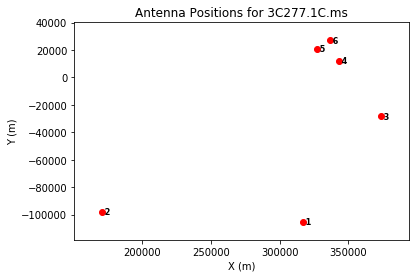

Show log 2018-11-29 12:58:27	INFO	plotants::::	
 2018-11-29 12:58:27	INFO	plotants::::+	##########################################
 2018-11-29 12:58:27	INFO	plotants::::+	##### Begin Task: plotants #####
 2018-11-29 12:58:27	INFO	plotants::::	plotants(vis="3C277.1C.ms",figfile="3C277.1C_plotants.png",antindex=False,logpos=False,exclude="",
 2018-11-29 12:58:27	INFO	plotants::::+ checkbaselines=False,title="")
 2018-11-29 12:58:27	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on 3C277.1C.ms...
 2018-11-29 12:58:27	INFO	plotants::::	Number of points being plotted: 6
 2018-11-29 12:58:27	INFO	plotants::::	##### End Task: plotants #####
 2018-11-29 12:58:27	INFO	plotants::::+	##########################################
 2018-11-29 12:58:28	INFO	clearstat::::	
 2018-11-29 12:58:28	INFO	clearstat::::+	##########################################
 2018-11-29 12:58:28	INFO	clearstat::::+	##### Begin Task: clearstat #####
 2018-11-29 12:58:28	INFO	clearstat::::	
 2018-11-29 12:58:28	INFO	clearstat::::	##### End Task: clearstat #####
 2018-11-29 12:58:28	INFO	clearstat::::+	##########################################

In [11]:
plotants(vis = msfile,
    figfile = prefix+'_plotants.png')
clearstat()

## Setting the flux scale

3C286 is a standard flux and polarization calibration source, with properties tabulated by Baars (1977). It is somewhat resolved even on the shortest MERLIN baselines at 5 GHz, hence a sub-standard flux density used (96% of Baars). It has 11.2% fractional polarization at uvPA 66 deg, which we use to work out Q and U and then insert the values in the MODEL data column of the measurement set using setjy: 

In [12]:
ipol = 7.073
qpol = 0.112*ipol*cos(66*pi/180.0)
upol = 0.112*ipol*sin(66*pi/180.0)

default(setjy)
setjy(vis = msfile,
    field = '3C286',
    standard = 'manual',
    fluxdensity = [ipol,qpol,upol,0.0])

{'0': {'0': {'fluxd': array([ 7.073     ,  0.32220701,  0.72368879,  0.        ])},
  'fieldName': '3C286'},
 'format': "{field Id: {spw Id: {fluxd: [I,Q,U,V] in Jy}, 'fieldName':field name }}"}

Show log 2018-11-29 12:58:28	INFO	default:::: ####### Setting values to default for task: setjy #######
 2018-11-29 12:58:28	INFO	setjy::::	
 2018-11-29 12:58:28	INFO	setjy::::+	##########################################
 2018-11-29 12:58:28	INFO	setjy::::+	##### Begin Task: setjy #####
 2018-11-29 12:58:28	INFO	setjy::::	setjy(vis="3C277.1C.ms",field="3C286",spw="",selectdata=False,timerange="",
 2018-11-29 12:58:28	INFO	setjy::::+ scan="",intent="",observation="",scalebychan=True,standard="manual",
 2018-11-29 12:58:28	INFO	setjy::::+ model="",modimage="",listmodels=False,fluxdensity=[7.073, 0.32220700696521515, 0.7236887864534851, 0.0],spix=0.0,
 2018-11-29 12:58:28	INFO	setjy::::+ reffreq="1GHz",polindex=[],polangle=[],rotmeas=0.0,fluxdict={},
 2018-11-29 12:58:28	INFO	setjy::::+ useephemdir=False,interpolation="nearest",usescratch=False,ismms=False)
 2018-11-29 12:58:28	INFO	setjy::::	{'field': '3C286'}
 2018-11-29 12:58:28	INFO	Imager::open() Opening MeasurementSet /scratch/condor_pool/condor/dir_199603/EDPNDmB3amtnCshSmpWEHpUqhcrQCoABFKDmT8zPDmABFKDmjCflRn/DIRAC_jIMCJbpilot/13840681/data/3C277.1C.ms
 2018-11-29 12:58:28	INFO	setjy::::	CASA Version 5.4.0-68 
 2018-11-29 12:58:28	INFO	setjy::::	
 2018-11-29 12:58:31	INFO	imager::setjy()	The applied flux density does not depend on frequency.
 2018-11-29 12:58:31	INFO	imager::data selection	Selected 31538 out of 210236 rows.
 2018-11-29 12:58:31	INFO	imager::setjy()	Will clear any existing model with matching field=3C286 and spw=*
 2018-11-29 12:58:31	INFO Clearing model records in MS header for selected fields.
 2018-11-29 12:58:31	INFO 3C286 (id = 0) not found.
 2018-11-29 12:58:31	INFO	imager::data selection	Selected 31538 out of 210236 rows.
 2018-11-29 12:58:31	INFO	imager::ft() Fourier transforming: replacing visibility model header
 2018-11-29 12:58:31	INFO	imager::createSkyEquation() Processing after subtracting componentlist /scratch/condor_pool/condor/dir_199603/EDPNDmB3amtnCshSmpWEHpUqhcrQCoABFKDmT8zPDmABFKDmjCflRn/DIRAC_jIMCJbpilot/13840681/data/3C277.1C.ms_setjy_spw0_3C286_4.994GHz49822.7d.cl
 2018-11-29 12:58:31	INFO	imager::createFTMachine() Performing interferometric gridding...
 2018-11-29 12:58:31	INFO	setjy::::	##### End Task: setjy #####
 2018-11-29 12:58:31	INFO	setjy::::+	##########################################

In order to get enough signal to noise for accurate amplitude solutions we need to average over a few minutes, but the phase changes more rapidly on the long MERLIN baselines. A lower signal to noise is adequate for phase solutions so we solve for phase first with a short solution interval (typically 0.5 min) before deriving amplitude corrections. Both types of calibration are derived using gaincal. 

In [13]:
default(gaincal)
gaincal(vis = msfile,
    caltable = prefix+'_cals.phcal',
    field = '3C286,OQ208,1300+580',    # No spaces!
    solint = '0.5min',
    refant = '5',    # pick antenna with good data near array centre 
    calmode = 'p',
    minsnr = 3.0,
    minblperant = 3)

Show log 2018-11-29 12:58:31	INFO	default:::: ####### Setting values to default for task: gaincal #######
 2018-11-29 12:58:31	INFO	gaincal::::	
 2018-11-29 12:58:31	INFO	gaincal::::+	##########################################
 2018-11-29 12:58:31	INFO	gaincal::::+	##### Begin Task: gaincal #####
 2018-11-29 12:58:31	INFO	gaincal::::	gaincal(vis="3C277.1C.ms",caltable="3C277.1C_cals.phcal",field="3C286,OQ208,1300+580",spw="",intent="",
 2018-11-29 12:58:31	INFO	gaincal::::+ selectdata=True,timerange="",uvrange="",antenna="",scan="",
 2018-11-29 12:58:31	INFO	gaincal::::+ observation="",msselect="",solint="0.5min",combine="",preavg=-1.0,
 2018-11-29 12:58:31	INFO	gaincal::::+ refant="5",refantmode="flex",minblperant=3,minsnr=3.0,solnorm=False,
 2018-11-29 12:58:31	INFO	gaincal::::+ gaintype="G",smodel=[],calmode="p",append=False,splinetime=3600.0,
 2018-11-29 12:58:31	INFO	gaincal::::+ npointaver=3,phasewrap=180.0,docallib=False,callib="",gaintable=[''],
 2018-11-29 12:58:31	INFO	gaincal::::+ gainfield=[''],interp=[],spwmap=[],parang=False)
 2018-11-29 12:58:31	INFO	gaincal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2018-11-29 12:58:31	INFO	gaincal::calibrater::open	Opening MS: 3C277.1C.ms for calibration.
 2018-11-29 12:58:32	INFO	gaincal::Calibrater::	Initializing nominal selection to the whole MS.
 2018-11-29 12:58:32	INFO	gaincal::::	NB: gaincal automatically excludes auto-correlations.
 2018-11-29 12:58:32	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2018-11-29 12:58:32	INFO	calibrater::reset	Reseting solve/apply state
 2018-11-29 12:58:32	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2018-11-29 12:58:32	INFO	Calibrater::selectvis+ Selecting on field: '3C286,OQ208,1300+580'
 2018-11-29 12:58:32	INFO	Calibrater::selectvis+ Selecting with TaQL: 'ANTENNA1!=ANTENNA2'
 2018-11-29 12:58:32	INFO	Calibrater::selectvis	By selection 210236 rows are reduced to 92906
 2018-11-29 12:58:32	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2018-11-29 12:58:32	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect='ANTENNA1!=ANTENNA2'
 2018-11-29 12:58:32	INFO	calibrater::setsolve	Beginning setsolve--(MSSelection version)-------
 2018-11-29 12:58:32	INFO	Calibrater::setsolve	Arranging to SOLVE:
 2018-11-29 12:58:32	INFO	Calibrater::setsolve	. G Jones: table=3C277.1C_cals.phcal append=false solint=0.5min refantmode='flex' refant='5' minsnr=3 apmode=P solnorm=false
 2018-11-29 12:58:32	INFO	calibrater::solve	Beginning solve-----------------------------
 2018-11-29 12:58:32	INFO	Calibrater::solve	The following calibration terms are arranged for apply:
 2018-11-29 12:58:32	INFO	Calibrater::solve	. (None)
 2018-11-29 12:58:32	INFO	Calibrater::solve	The following calibration term is arranged for solve:
 2018-11-29 12:58:32	INFO	Calibrater::solve	. G Jones: table=3C277.1C_cals.phcal append=false solint=0.5min refantmode='flex' refant='5' minsnr=3 apmode=P solnorm=false
 2018-11-29 12:58:32	INFO	ChannelAverageTVI::parseConfiguration	Channel bin is [-1]
 2018-11-29 12:58:32	INFO	Calibrater::solve	For solint = 0.5min, found 1785 solution intervals.
 2018-11-29 12:58:39	INFO	Calibrater::solve Found good G Jones solutions in 1785 solution intervals.
 2018-11-29 12:58:39	INFO Applying refant: 5 refantmode = flex (hold alternate refants' phase constant) when refant flagged
 2018-11-29 12:58:39	INFO At 1995/04/17/01:37:38.0 (Spw=0, Fld=0), using refant 6 (id=5) (alternate)
 2018-11-29 12:58:39	INFO At 1995/04/20/08:16:03.0 (Spw=0, Fld=1), using refant 6 (id=5) (alternate)
 2018-11-29 12:58:39	INFO NB: An alternate refant was used at least once to maintain
 2018-11-29 12:58:39	INFO	+ phase continuity where the user's preferred refant drops out.
 2018-11-29 12:58:39	INFO	+ Alternate refants are held constant in phase (_not_ zeroed)
 2018-11-29 12:58:39	INFO	+ during these periods, and the preferred refant

 Check the logger and plot the solutions: 

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


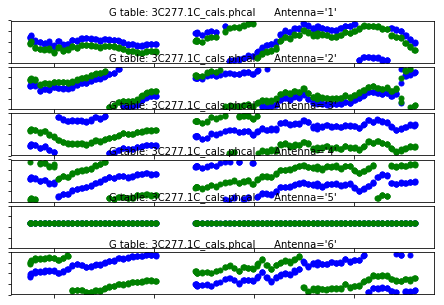

Show log 2018-11-29 12:58:43	INFO	default:::: ####### Setting values to default for task: plotcal #######
 2018-11-29 12:58:43	INFO	plotcal::::	
 2018-11-29 12:58:43	INFO	plotcal::::+	##########################################
 2018-11-29 12:58:43	INFO	plotcal::::+	##### Begin Task: plotcal #####
 2018-11-29 12:58:43	INFO	plotcal::::	plotcal(caltable="3C277.1C_cals.phcal",xaxis="time",yaxis="phase",poln="",field="1300+580",
 2018-11-29 12:58:43	INFO	plotcal::::+ antenna="",spw="",timerange="",subplot=611,overplot=False,
 2018-11-29 12:58:43	INFO	plotcal::::+ clearpanel="Auto",iteration="antenna",plotrange=[-1, -1, -180, 180],showflags=False,plotsymbol="o",
 2018-11-29 12:58:43	INFO	plotcal::::+ plotcolor="blue",markersize=5.0,fontsize=10.0,showgui=True,figfile="3C277.1C_cals.phcal.png")
 2018-11-29 12:58:43	INFO	tableplot::setgui	Switching to GUI mode. All current plots will be reset.
 2018-11-29 12:58:43	INFO	plotcal::createCalTab Detected a NewCalTable!
 2018-11-29 12:58:43	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:58:43	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:58:43	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:58:43	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:58:43	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:58:43	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:58:43	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:58:43	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:58:43	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:58:43	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:58:43	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:58:43	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:58:44	INFO	FlagVersion::saveFlagVersion	Saving plot to file 3C277.1C_cals.phcal.png
 2018-11-29 12:58:44	INFO	plotcal::::	##### End Task: plotcal #####
 2018-11-29 12:58:44	INFO	plotcal::::+	##########################################

In [14]:
default(plotcal)
plotcal(caltable = prefix+'_cals.phcal',
    field = '1300+580',
    subplot = 611,
    iteration = 'antenna',
    xaxis ='time',
    yaxis ='phase',
    plotrange = [-1, -1, -180, 180],
    figfile = prefix+'_cals.phcal.png')

Phase reference source phase solutions (the range is [-180,+180] deg)

Check the solutions for the other calibration sources. Even where the phase solutions are going round quite fast, they should not be random. 3C286 is heavily resolved on the longer baselines so we derive amplitude solutions for it and OQ208 on short baselines only, applying the phase solutions. minsnr=-1 is a fix to allow solutions to be passed on only 3 baselines. 

In [15]:
gaincal(vis = msfile,
    caltable = prefix+'_cals.a1cal',
    field = '3C286,OQ208',    # No spaces!
    antenna = '4~6&4~6',
    solint = '2min',
    refant = '5',    # pick antenna with good data near array centre 
    calmode = 'ap',
    minsnr = -1,
    minblperant = 2,
    gaintable = prefix+'_cals.phcal')

Show log 2018-11-29 12:58:44	INFO	gaincal::::	
 2018-11-29 12:58:44	INFO	gaincal::::+	##########################################
 2018-11-29 12:58:44	INFO	gaincal::::+	##### Begin Task: gaincal #####
 2018-11-29 12:58:44	INFO	gaincal::::	gaincal(vis="3C277.1C.ms",caltable="3C277.1C_cals.a1cal",field="3C286,OQ208",spw="",intent="",
 2018-11-29 12:58:44	INFO	gaincal::::+ selectdata=True,timerange="",uvrange="",antenna="4~6&4~6",scan="",
 2018-11-29 12:58:44	INFO	gaincal::::+ observation="",msselect="",solint="2min",combine="",preavg=-1.0,
 2018-11-29 12:58:44	INFO	gaincal::::+ refant="5",refantmode="flex",minblperant=2,minsnr=-1,solnorm=False,
 2018-11-29 12:58:44	INFO	gaincal::::+ gaintype="G",smodel=[],calmode="ap",append=False,splinetime=3600.0,
 2018-11-29 12:58:44	INFO	gaincal::::+ npointaver=3,phasewrap=180.0,docallib=False,callib="",gaintable="3C277.1C_cals.phcal",
 2018-11-29 12:58:44	INFO	gaincal::::+ gainfield=[''],interp=[],spwmap=[],parang=False)
 2018-11-29 12:58:44	INFO	gaincal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2018-11-29 12:58:44	INFO	gaincal::calibrater::open	Opening MS: 3C277.1C.ms for calibration.
 2018-11-29 12:58:44	INFO	gaincal::Calibrater::	Initializing nominal selection to the whole MS.
 2018-11-29 12:58:44	INFO	gaincal::::	NB: gaincal automatically excludes auto-correlations.
 2018-11-29 12:58:44	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2018-11-29 12:58:44	INFO	calibrater::reset	Reseting solve/apply state
 2018-11-29 12:58:44	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2018-11-29 12:58:44	INFO	Calibrater::selectvis+ Selecting on field: '3C286,OQ208'
 2018-11-29 12:58:44	INFO	Calibrater::selectvis+ Selecting on antenna/baseline: '4~6&4~6'
 2018-11-29 12:58:44	INFO	Calibrater::selectvis+ Selecting with TaQL: 'ANTENNA1!=ANTENNA2'
 2018-11-29 12:58:44	INFO	Calibrater::selectvis	By selection 210236 rows are reduced to 16093
 2018-11-29 12:58:44	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2018-11-29 12:58:44	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect='ANTENNA1!=ANTENNA2'
 2018-11-29 12:58:44	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 12:58:44	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 12:58:44	INFO	Calibrater::setapply(type, applypar)	. G Jones: table=3C277.1C_cals.phcal select= interp=linear spwmap=[-1] calWt=true
 2018-11-29 12:58:44	INFO	calibrater::setsolve	Beginning setsolve--(MSSelection version)-------
 2018-11-29 12:58:44	INFO	Calibrater::setsolve	Arranging to SOLVE:
 2018-11-29 12:58:44	INFO	Calibrater::setsolve	. G Jones: table=3C277.1C_cals.a1cal append=false solint=2min refantmode='flex' refant='5' minsnr=-1 apmode=AP solnorm=false
 2018-11-29 12:58:44	INFO	calibrater::solve	Beginning solve-----------------------------
 2018-11-29 12:58:44	INFO	Calibrater::solve	The following calibration terms are arranged for apply:
 2018-11-29 12:58:44	INFO	Calibrater::solve	. G Jones: table=3C277.1C_cals.phcal select= interp=linear spwmap=[-1] calWt=true
 2018-11-29 12:58:44	INFO	Calibrater::solve	The following calibration term is arranged for solve:
 2018-11-29 12:58:44	INFO	Calibrater::solve	. G Jones: table=3C277.1C_cals.a1cal append=false solint=2min refantmode='flex' refant='5' minsnr=-1 apmode=AP solnorm=false
 2018-11-29 12:58:44	INFO	ChannelAverageTVI::parseConfiguration	Channel bin is [-1]
 2018-11-29 12:58:44	INFO	Calibrater::solve	For solint = 2min, found 435 solution intervals.
 2018-11-29 12:58:48	INFO	Calibrater::solve Found good G Jones solutions in 403 solution intervals.
 2018-11-29 12:58:48	INFO Applying refant: 5 refantmode = flex (hold alternate refants' phase constant) when refant flagged
 2018-11-29 12:58:49	INFO Writing solutions to table: 3C277.1C_cals.a1cal
 2018-11-29 12:58:50	INFO	calibrater::solve	Finished solving.
 2018-11-29 12

 Check the solutions, which should be within a few percent of unity. 

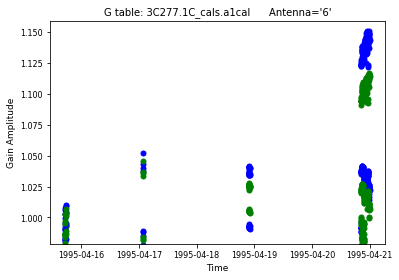

Show log 2018-11-29 12:58:50	INFO	default:::: ####### Setting values to default for task: plotcal #######
 2018-11-29 12:58:50	INFO	plotcal::::	
 2018-11-29 12:58:50	INFO	plotcal::::+	##########################################
 2018-11-29 12:58:50	INFO	plotcal::::+	##### Begin Task: plotcal #####
 2018-11-29 12:58:50	INFO	plotcal::::	plotcal(caltable="3C277.1C_cals.a1cal",xaxis="time",yaxis="amp",poln="",field="3C286",
 2018-11-29 12:58:50	INFO	plotcal::::+ antenna="4,5,6",spw="",timerange="",subplot=311,overplot=False,
 2018-11-29 12:58:50	INFO	plotcal::::+ clearpanel="Auto",iteration="antenna",plotrange=[-1, -1, -1, -1],showflags=False,plotsymbol="o",
 2018-11-29 12:58:50	INFO	plotcal::::+ plotcolor="blue",markersize=5.0,fontsize=10.0,showgui=True,figfile="3C277.1C_3C286_cals.a1cal.png")
 2018-11-29 12:58:50	INFO	tableplot::setgui	Switching to GUI mode. All current plots will be reset.
 2018-11-29 12:58:50	INFO	plotcal::createCalTab Detected a NewCalTable!
 2018-11-29 12:58:50	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:58:50	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:58:50	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:58:50	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:58:50	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:58:50	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:58:50	INFO	FlagVersion::saveFlagVersion	Saving plot to file 3C277.1C_3C286_cals.a1cal.png
 2018-11-29 12:58:50	INFO	plotcal::::	##### End Task: plotcal #####
 2018-11-29 12:58:50	INFO	plotcal::::+	##########################################

In [16]:
default(plotcal)
plotcal(caltable = prefix+'_cals.a1cal',
    field = '3C286',
    antenna = '4,5,6',
    subplot = 311,
    iteration='antenna',
    xaxis='time',
    yaxis='amp',
    plotrange=[-1, -1, -1, -1],
    figfile=prefix+'_3C286_cals.a1cal.png')

Also check OQ208 - this will have a different mean because there is not yet a proper model. Flag any solutions with a large scatter. 

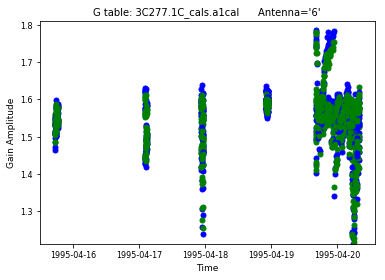

Show log 2018-11-29 12:58:51	INFO	plotcal::::	
 2018-11-29 12:58:51	INFO	plotcal::::+	##########################################
 2018-11-29 12:58:51	INFO	plotcal::::+	##### Begin Task: plotcal #####
 2018-11-29 12:58:51	INFO	plotcal::::	plotcal(caltable="3C277.1C_cals.a1cal",xaxis="time",yaxis="amp",poln="",field="OQ208",
 2018-11-29 12:58:51	INFO	plotcal::::+ antenna="4,5,6",spw="",timerange="",subplot=311,overplot=False,
 2018-11-29 12:58:51	INFO	plotcal::::+ clearpanel="Auto",iteration="antenna",plotrange=[-1, -1, -1, -1],showflags=False,plotsymbol="o",
 2018-11-29 12:58:51	INFO	plotcal::::+ plotcolor="blue",markersize=5.0,fontsize=10.0,showgui=True,figfile="3C277.1C_OQ208_cals.a1cal.png")
 2018-11-29 12:58:51	INFO	tableplot::setgui	Switching to GUI mode. All current plots will be reset.
 2018-11-29 12:58:51	INFO	plotcal::createCalTab Detected a NewCalTable!
 2018-11-29 12:58:51	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:58:51	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:58:51	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:58:51	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:58:51	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:58:51	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:58:51	INFO	FlagVersion::saveFlagVersion	Saving plot to file 3C277.1C_OQ208_cals.a1cal.png
 2018-11-29 12:58:51	INFO	plotcal::::	##### End Task: plotcal #####
 2018-11-29 12:58:51	INFO	plotcal::::+	##########################################

In [17]:
plotcal(caltable = prefix+'_cals.a1cal',
    field = 'OQ208',
    antenna = '4,5,6',
    subplot = 311,
    iteration='antenna',
    xaxis='time',
    yaxis='amp',
    plotrange=[-1, -1, -1, -1],
    figfile=prefix+'_OQ208_cals.a1cal.png')

fluxscale is used to compare the solutions for OQ208 with those of 3C286 to find the flux density of the former. 

In [18]:
default(fluxscale)
fluxscale(vis = msfile,
    caltable = prefix+'_cals.a1cal',
    fluxtable = prefix+'_OQ208.flux',
    reference = '3C286',
    transfer = 'OQ208')

{'1': {'0': {'fluxd': array([ 2.26123085,  0.        ,  0.        ,  0.        ]),
   'fluxdErr': array([ 0.07261135,  0.        ,  0.        ,  0.        ]),
   'numSol': array([ 6.,  0.,  0.,  0.])},
  'fieldName': 'OQ208',
  'fitFluxd': 0.0,
  'fitFluxdErr': 0.0,
  'fitRefFreq': 0.0,
  'spidx': array([ 0.,  0.,  0.]),
  'spidxerr': array([ 0.,  0.,  0.])},
 'freq': array([  4.99400000e+09]),
 'spwID': array([0], dtype=int32),
 'spwName': array(['none'],
       dtype='|S5')}

Show log 2018-11-29 12:58:51	INFO	default:::: ####### Setting values to default for task: fluxscale #######
 2018-11-29 12:58:51	INFO	fluxscale::::	
 2018-11-29 12:58:51	INFO	fluxscale::::+	##########################################
 2018-11-29 12:58:51	INFO	fluxscale::::+	##### Begin Task: fluxscale #####
 2018-11-29 12:58:51	INFO	fluxscale::::	fluxscale(vis="3C277.1C.ms",caltable="3C277.1C_cals.a1cal",fluxtable="3C277.1C_OQ208.flux",reference="3C286",transfer="OQ208",
 2018-11-29 12:58:51	INFO	fluxscale::::+ listfile="",append=False,refspwmap=[-1],gainthreshold=-1.0,antenna="",
 2018-11-29 12:58:51	INFO	fluxscale::::+ timerange="",scan="",incremental=False,fitorder=1,display=False)
 2018-11-29 12:58:51	INFO	fluxscale::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2018-11-29 12:58:51	INFO	fluxscale::calibrater::open	Opening MS: 3C277.1C.ms for calibration.
 2018-11-29 12:58:51	INFO	fluxscale::Calibrater::	Initializing nominal selection to the whole MS.
 2018-11-29 12:58:51	INFO	fluxscale::calibrater::fluxscale	Beginning fluxscale--(MSSelection version)-------
 2018-11-29 12:58:51	INFO	fluxscale:::: Found reference field(s): 3C286
 2018-11-29 12:58:51	INFO	fluxscale:::: Found transfer field(s): OQ208
 2018-11-29 12:58:51	INFO	fluxscale:::: Flux density for OQ208 in SpW=0 (freq=4.994e+09 Hz) is: 2.26123 +/- 0.0726113 (SNR = 31.1416, N = 6)
 2018-11-29 12:58:52	INFO	fluxscale::Calibrater::fluxscale	Storing result in 3C277.1C_OQ208.flux
 2018-11-29 12:58:52	INFO	fluxscale::::	Writing solutions to table: 3C277.1C_OQ208.flux
 2018-11-29 12:58:53	INFO	fluxscale::::	CASA Version 5.4.0-68 
 2018-11-29 12:58:53	INFO	fluxscale::::	
 2018-11-29 12:58:55	INFO	fluxscale::::	##### End Task: fluxscale #####
 2018-11-29 12:58:55	INFO	fluxscale::::+	##########################################

Note the OQ208 flux density in the logger; the scatter should be less than 1%. I got

Flux density for OQ208 in SpW=0 is: 2.3099 +/- 0.00530734 (SNR = 435.226, nAnt= 3) 

The fluxtable will contain the proper scaling, but since we have only used a subset of antennas we have to set the flux density of OQ208 (insert your value below) and repeat the amplitude calibration using all antennas:



In [19]:
default(setjy)
setjy(vis = msfile,
    field = 'OQ208',
    standard = 'manual',
    fluxdensity = [2.31,0])

{'1': {'0': {'fluxd': array([ 2.31,  0.  ,  0.  ,  0.  ])},
  'fieldName': 'OQ208'},
 'format': "{field Id: {spw Id: {fluxd: [I,Q,U,V] in Jy}, 'fieldName':field name }}"}

Show log 2018-11-29 12:58:55	INFO	default:::: ####### Setting values to default for task: setjy #######
 2018-11-29 12:58:55	INFO	setjy::::	
 2018-11-29 12:58:55	INFO	setjy::::+	##########################################
 2018-11-29 12:58:55	INFO	setjy::::+	##### Begin Task: setjy #####
 2018-11-29 12:58:55	INFO	setjy::::	setjy(vis="3C277.1C.ms",field="OQ208",spw="",selectdata=False,timerange="",
 2018-11-29 12:58:55	INFO	setjy::::+ scan="",intent="",observation="",scalebychan=True,standard="manual",
 2018-11-29 12:58:55	INFO	setjy::::+ model="",modimage="",listmodels=False,fluxdensity=[2.31, 0],spix=0.0,
 2018-11-29 12:58:55	INFO	setjy::::+ reffreq="1GHz",polindex=[],polangle=[],rotmeas=0.0,fluxdict={},
 2018-11-29 12:58:55	INFO	setjy::::+ useephemdir=False,interpolation="nearest",usescratch=False,ismms=False)
 2018-11-29 12:58:55	INFO	setjy::::	{'field': 'OQ208'}
 2018-11-29 12:58:55	INFO	Imager::open() Opening MeasurementSet /scratch/condor_pool/condor/dir_199603/EDPNDmB3amtnCshSmpWEHpUqhcrQCoABFKDmT8zPDmABFKDmjCflRn/DIRAC_jIMCJbpilot/13840681/data/3C277.1C.ms
 2018-11-29 12:58:55	INFO	setjy::::	CASA Version 5.4.0-68 
 2018-11-29 12:58:55	INFO	setjy::::	
 2018-11-29 12:58:58	INFO	imager::setjy()	The applied flux density does not depend on frequency.
 2018-11-29 12:58:58	INFO	imager::data selection	Selected 49583 out of 210236 rows.
 2018-11-29 12:58:58	INFO	imager::setjy()	Will clear any existing model with matching field=OQ208 and spw=*
 2018-11-29 12:58:58	INFO Clearing model records in MS header for selected fields.
 2018-11-29 12:58:58	INFO OQ208 (id = 1) not found.
 2018-11-29 12:58:58	INFO	imager::data selection	Selected 49583 out of 210236 rows.
 2018-11-29 12:58:58	INFO	imager::ft() Fourier transforming: replacing visibility model header
 2018-11-29 12:58:58	INFO	imager::createSkyEquation() Processing after subtracting componentlist /scratch/condor_pool/condor/dir_199603/EDPNDmB3amtnCshSmpWEHpUqhcrQCoABFKDmT8zPDmABFKDmjCflRn/DIRAC_jIMCJbpilot/13840681/data/3C277.1C.ms_setjy_spw0_OQ208_1GHz49822.7d.cl
 2018-11-29 12:58:58	INFO	imager::createFTMachine() Performing interferometric gridding...
 2018-11-29 12:58:58	INFO	setjy::::	##### End Task: setjy #####
 2018-11-29 12:58:58	INFO	setjy::::+	##########################################

 Use this to find the flux density of the phase reference source on all baselines 

In [20]:
gaincal(vis = msfile,
    caltable = prefix+'_cals.a2cal',
    field = 'OQ208,1300+580',
    antenna = '',
    solint = '2min',
    refant = '5',
    calmode = 'ap',
    minsnr = 3,
    minblperant = 4,
    gaintable = prefix+'_cals.phcal',
    selectdata = False)

Show log 2018-11-29 12:58:58	INFO	gaincal::::	
 2018-11-29 12:58:58	INFO	gaincal::::+	##########################################
 2018-11-29 12:58:58	INFO	gaincal::::+	##### Begin Task: gaincal #####
 2018-11-29 12:58:58	INFO	gaincal::::	gaincal(vis="3C277.1C.ms",caltable="3C277.1C_cals.a2cal",field="OQ208,1300+580",spw="",intent="",
 2018-11-29 12:58:58	INFO	gaincal::::+ selectdata=False,timerange="",uvrange="",antenna="",scan="",
 2018-11-29 12:58:58	INFO	gaincal::::+ observation="",msselect="",solint="2min",combine="",preavg=-1.0,
 2018-11-29 12:58:58	INFO	gaincal::::+ refant="5",refantmode="flex",minblperant=4,minsnr=3,solnorm=False,
 2018-11-29 12:58:58	INFO	gaincal::::+ gaintype="G",smodel=[],calmode="ap",append=False,splinetime=3600.0,
 2018-11-29 12:58:58	INFO	gaincal::::+ npointaver=3,phasewrap=180.0,docallib=False,callib="",gaintable="3C277.1C_cals.phcal",
 2018-11-29 12:58:58	INFO	gaincal::::+ gainfield=[''],interp=[],spwmap=[],parang=False)
 2018-11-29 12:58:58	INFO	gaincal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2018-11-29 12:58:58	INFO	gaincal::calibrater::open	Opening MS: 3C277.1C.ms for calibration.
 2018-11-29 12:58:58	INFO	gaincal::Calibrater::	Initializing nominal selection to the whole MS.
 2018-11-29 12:58:58	INFO	gaincal::::	NB: gaincal automatically excludes auto-correlations.
 2018-11-29 12:58:58	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2018-11-29 12:58:58	INFO	calibrater::reset	Reseting solve/apply state
 2018-11-29 12:58:58	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2018-11-29 12:58:58	INFO	Calibrater::selectvis+ Selecting on field: 'OQ208,1300+580'
 2018-11-29 12:58:58	INFO	Calibrater::selectvis+ Selecting with TaQL: 'ANTENNA1!=ANTENNA2'
 2018-11-29 12:58:58	INFO	Calibrater::selectvis	By selection 210236 rows are reduced to 61368
 2018-11-29 12:58:58	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2018-11-29 12:58:58	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect='ANTENNA1!=ANTENNA2'
 2018-11-29 12:58:58	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 12:58:58	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 12:58:58	INFO	Calibrater::setapply(type, applypar)	. G Jones: table=3C277.1C_cals.phcal select= interp=linear spwmap=[-1] calWt=true
 2018-11-29 12:58:58	INFO	calibrater::setsolve	Beginning setsolve--(MSSelection version)-------
 2018-11-29 12:58:58	INFO	Calibrater::setsolve	Arranging to SOLVE:
 2018-11-29 12:58:58	INFO	Calibrater::setsolve	. G Jones: table=3C277.1C_cals.a2cal append=false solint=2min refantmode='flex' refant='5' minsnr=3 apmode=AP solnorm=false
 2018-11-29 12:58:58	INFO	calibrater::solve	Beginning solve-----------------------------
 2018-11-29 12:58:58	INFO	Calibrater::solve	The following calibration terms are arranged for apply:
 2018-11-29 12:58:58	INFO	Calibrater::solve	. G Jones: table=3C277.1C_cals.phcal select= interp=linear spwmap=[-1] calWt=true
 2018-11-29 12:58:58	INFO	Calibrater::solve	The following calibration term is arranged for solve:
 2018-11-29 12:58:58	INFO	Calibrater::solve	. G Jones: table=3C277.1C_cals.a2cal append=false solint=2min refantmode='flex' refant='5' minsnr=3 apmode=AP solnorm=false
 2018-11-29 12:58:58	INFO	ChannelAverageTVI::parseConfiguration	Channel bin is [-1]
 2018-11-29 12:58:59	INFO	Calibrater::solve	For solint = 2min, found 364 solution intervals.
 2018-11-29 12:59:04	INFO	Calibrater::solve Found good G Jones solutions in 354 solution intervals.
 2018-11-29 12:59:04	INFO Applying refant: 5 refantmode = flex (hold alternate refants' phase constant) when refant flagged
 2018-11-29 12:59:04	INFO At 1995/04/20/08:16:47.0 (Spw=0, Fld=1), using refant 6 (id=5) (alternate)
 2018-11-29 12:59:04	INFO NB: An alternate refant was used at least once to maintain
 2018-11-29 12:59:04	INFO	+ phase continuity where the us

 Use plotcal to check the solutions (see previously); assuming that they are OK use fluxscale: 

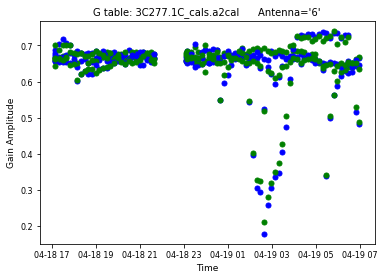

Show log 2018-11-29 12:59:06	INFO	plotcal::::	
 2018-11-29 12:59:06	INFO	plotcal::::+	##########################################
 2018-11-29 12:59:06	INFO	plotcal::::+	##### Begin Task: plotcal #####
 2018-11-29 12:59:06	INFO	plotcal::::	plotcal(caltable="3C277.1C_cals.a2cal",xaxis="time",yaxis="amp",poln="",field="1300+580",
 2018-11-29 12:59:06	INFO	plotcal::::+ antenna="4,5,6",spw="",timerange="",subplot=311,overplot=False,
 2018-11-29 12:59:06	INFO	plotcal::::+ clearpanel="Auto",iteration="antenna",plotrange=[-1, -1, -1, -1],showflags=False,plotsymbol="o",
 2018-11-29 12:59:06	INFO	plotcal::::+ plotcolor="blue",markersize=5.0,fontsize=10.0,showgui=True,figfile="3C277.1C_1300+580_cals.a2cal.png")
 2018-11-29 12:59:06	INFO	tableplot::setgui	Switching to GUI mode. All current plots will be reset.
 2018-11-29 12:59:06	INFO	plotcal::createCalTab Detected a NewCalTable!
 2018-11-29 12:59:06	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:59:06	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:59:06	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:59:06	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:59:06	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:59:06	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:59:06	INFO	FlagVersion::saveFlagVersion	Saving plot to file 3C277.1C_1300+580_cals.a2cal.png
 2018-11-29 12:59:06	INFO	plotcal::::	##### End Task: plotcal #####
 2018-11-29 12:59:06	INFO	plotcal::::+	##########################################

In [21]:
plotcal(caltable = prefix+'_cals.a2cal',
    field = '1300+580',
    antenna = '4,5,6',
    subplot = 311,
    iteration='antenna',
    xaxis='time',
    yaxis='amp',
    plotrange=[-1, -1, -1, -1],
    figfile=prefix+'_1300+580_cals.a2cal.png')

In [22]:
fluxscale(vis = msfile,
    caltable = prefix+'_cals.a2cal',
    fluxtable = prefix+'_1300+580.flux',
    reference = 'OQ208',
    transfer = '1300+580')

{'10': {'0': {'fluxd': array([ 0.42360562,  0.        ,  0.        ,  0.        ]),
   'fluxdErr': array([ 0.01161333,  0.        ,  0.        ,  0.        ]),
   'numSol': array([ 12.,   0.,   0.,   0.])},
  'fieldName': '1300+580',
  'fitFluxd': 0.0,
  'fitFluxdErr': 0.0,
  'fitRefFreq': 0.0,
  'spidx': array([ 0.,  0.,  0.]),
  'spidxerr': array([ 0.,  0.,  0.])},
 'freq': array([  4.99400000e+09]),
 'spwID': array([0], dtype=int32),
 'spwName': array(['none'],
       dtype='|S5')}

Show log 2018-11-29 12:59:06	INFO	fluxscale::::	
 2018-11-29 12:59:06	INFO	fluxscale::::+	##########################################
 2018-11-29 12:59:06	INFO	fluxscale::::+	##### Begin Task: fluxscale #####
 2018-11-29 12:59:06	INFO	fluxscale::::	fluxscale(vis="3C277.1C.ms",caltable="3C277.1C_cals.a2cal",fluxtable="3C277.1C_1300+580.flux",reference="OQ208",transfer="1300+580",
 2018-11-29 12:59:06	INFO	fluxscale::::+ listfile="",append=False,refspwmap=[-1],gainthreshold=-1.0,antenna="",
 2018-11-29 12:59:06	INFO	fluxscale::::+ timerange="",scan="",incremental=False,fitorder=1,display=False)
 2018-11-29 12:59:06	INFO	fluxscale::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2018-11-29 12:59:06	INFO	fluxscale::calibrater::open	Opening MS: 3C277.1C.ms for calibration.
 2018-11-29 12:59:06	INFO	fluxscale::Calibrater::	Initializing nominal selection to the whole MS.
 2018-11-29 12:59:06	INFO	fluxscale::calibrater::fluxscale	Beginning fluxscale--(MSSelection version)-------
 2018-11-29 12:59:06	INFO	fluxscale:::: Found reference field(s): OQ208
 2018-11-29 12:59:06	INFO	fluxscale:::: Found transfer field(s): 1300+580
 2018-11-29 12:59:07	INFO	fluxscale:::: Flux density for 1300+580 in SpW=0 (freq=4.994e+09 Hz) is: 0.423606 +/- 0.0116133 (SNR = 36.4758, N = 12)
 2018-11-29 12:59:07	INFO	fluxscale::Calibrater::fluxscale	Storing result in 3C277.1C_1300+580.flux
 2018-11-29 12:59:07	INFO	fluxscale::::	Writing solutions to table: 3C277.1C_1300+580.flux
 2018-11-29 12:59:08	INFO	fluxscale::::	CASA Version 5.4.0-68 
 2018-11-29 12:59:08	INFO	fluxscale::::	
 2018-11-29 12:59:10	INFO	fluxscale::::	##### End Task: fluxscale #####
 2018-11-29 12:59:10	INFO	fluxscale::::+	##########################################

Note the flux density of 1300+580 from the logger and set this. This is not strictly necessary as you could simply use the rescaled fluxtable, but it makes accounting easier in later calibration. I got

Flux density for 1300+580 in SpW=0 is: 0.425989 +/- 0.000969224 (SNR = 439.515, nAnt= 6)

In [23]:
setjy(vis = msfile,
    field = '1300+580',
    standard = 'manual',
    fluxdensity = [0.426,0])

{'10': {'0': {'fluxd': array([ 0.426,  0.   ,  0.   ,  0.   ])},
  'fieldName': '1300+580'},
 'format': "{field Id: {spw Id: {fluxd: [I,Q,U,V] in Jy}, 'fieldName':field name }}"}

Show log 2018-11-29 12:59:10	INFO	setjy::::	
 2018-11-29 12:59:10	INFO	setjy::::+	##########################################
 2018-11-29 12:59:10	INFO	setjy::::+	##### Begin Task: setjy #####
 2018-11-29 12:59:10	INFO	setjy::::	setjy(vis="3C277.1C.ms",field="1300+580",spw="",selectdata=False,timerange="",
 2018-11-29 12:59:10	INFO	setjy::::+ scan="",intent="",observation="",scalebychan=True,standard="manual",
 2018-11-29 12:59:10	INFO	setjy::::+ model="",modimage="",listmodels=False,fluxdensity=[0.426, 0],spix=0.0,
 2018-11-29 12:59:10	INFO	setjy::::+ reffreq="1GHz",polindex=[],polangle=[],rotmeas=0.0,fluxdict={},
 2018-11-29 12:59:10	INFO	setjy::::+ useephemdir=False,interpolation="nearest",usescratch=False,ismms=False)
 2018-11-29 12:59:10	INFO	setjy::::	{'field': '1300+580'}
 2018-11-29 12:59:10	INFO	Imager::open() Opening MeasurementSet /scratch/condor_pool/condor/dir_199603/EDPNDmB3amtnCshSmpWEHpUqhcrQCoABFKDmT8zPDmABFKDmjCflRn/DIRAC_jIMCJbpilot/13840681/data/3C277.1C.ms
 2018-11-29 12:59:10	INFO	setjy::::	CASA Version 5.4.0-68 
 2018-11-29 12:59:10	INFO	setjy::::	
 2018-11-29 12:59:12	INFO	imager::setjy()	The applied flux density does not depend on frequency.
 2018-11-29 12:59:12	INFO	imager::data selection	Selected 11785 out of 210236 rows.
 2018-11-29 12:59:12	INFO	imager::setjy()	Will clear any existing model with matching field=1300+580 and spw=*
 2018-11-29 12:59:12	INFO Clearing model records in MS header for selected fields.
 2018-11-29 12:59:12	INFO 1300+580 (id = 10) not found.
 2018-11-29 12:59:12	INFO	imager::data selection	Selected 11785 out of 210236 rows.
 2018-11-29 12:59:12	INFO	imager::ft() Fourier transforming: replacing visibility model header
 2018-11-29 12:59:12	INFO	imager::createSkyEquation() Processing after subtracting componentlist /scratch/condor_pool/condor/dir_199603/EDPNDmB3amtnCshSmpWEHpUqhcrQCoABFKDmT8zPDmABFKDmjCflRn/DIRAC_jIMCJbpilot/13840681/data/3C277.1C.ms_setjy_spw0_1300+580_1GHz49822.7d.cl
 2018-11-29 12:59:12	INFO	imager::createFTMachine() Performing interferometric gridding...
 2018-11-29 12:59:13	INFO	setjy::::	##### End Task: setjy #####
 2018-11-29 12:59:13	INFO	setjy::::+	##########################################

## Phase reference source solutions

prefix+'_cals.phcal' (i.e. 3C277.1C_cals.phcal) contains phase-only solutions for all the calibration sources including the phase reference source. Make a calibration table for the phase reference source with the amplitude gains correctly scaled with respect to the derived flux density. 

In [24]:
gaincal(vis = msfile,
    caltable = prefix+'_cals.acal',
    field = '1300+580',    # No spaces!
    antenna = '',
    solint = '2min',
    refant = '5',    # pick antenna with good data near array centre 
    calmode = 'ap',
    minsnr = 3,
    minblperant = 4,
    gaintable = prefix+'_cals.phcal',
    selectdata = False)

Show log 2018-11-29 12:59:13	INFO	gaincal::::	
 2018-11-29 12:59:13	INFO	gaincal::::+	##########################################
 2018-11-29 12:59:13	INFO	gaincal::::+	##### Begin Task: gaincal #####
 2018-11-29 12:59:13	INFO	gaincal::::	gaincal(vis="3C277.1C.ms",caltable="3C277.1C_cals.acal",field="1300+580",spw="",intent="",
 2018-11-29 12:59:13	INFO	gaincal::::+ selectdata=False,timerange="",uvrange="",antenna="",scan="",
 2018-11-29 12:59:13	INFO	gaincal::::+ observation="",msselect="",solint="2min",combine="",preavg=-1.0,
 2018-11-29 12:59:13	INFO	gaincal::::+ refant="5",refantmode="flex",minblperant=4,minsnr=3,solnorm=False,
 2018-11-29 12:59:13	INFO	gaincal::::+ gaintype="G",smodel=[],calmode="ap",append=False,splinetime=3600.0,
 2018-11-29 12:59:13	INFO	gaincal::::+ npointaver=3,phasewrap=180.0,docallib=False,callib="",gaintable="3C277.1C_cals.phcal",
 2018-11-29 12:59:13	INFO	gaincal::::+ gainfield=[''],interp=[],spwmap=[],parang=False)
 2018-11-29 12:59:13	INFO	gaincal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2018-11-29 12:59:13	INFO	gaincal::calibrater::open	Opening MS: 3C277.1C.ms for calibration.
 2018-11-29 12:59:13	INFO	gaincal::Calibrater::	Initializing nominal selection to the whole MS.
 2018-11-29 12:59:13	INFO	gaincal::::	NB: gaincal automatically excludes auto-correlations.
 2018-11-29 12:59:13	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2018-11-29 12:59:13	INFO	calibrater::reset	Reseting solve/apply state
 2018-11-29 12:59:13	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2018-11-29 12:59:13	INFO	Calibrater::selectvis+ Selecting on field: '1300+580'
 2018-11-29 12:59:13	INFO	Calibrater::selectvis+ Selecting with TaQL: 'ANTENNA1!=ANTENNA2'
 2018-11-29 12:59:13	INFO	Calibrater::selectvis	By selection 210236 rows are reduced to 11785
 2018-11-29 12:59:13	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2018-11-29 12:59:13	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect='ANTENNA1!=ANTENNA2'
 2018-11-29 12:59:13	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 12:59:13	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 12:59:13	INFO	Calibrater::setapply(type, applypar)	. G Jones: table=3C277.1C_cals.phcal select= interp=linear spwmap=[-1] calWt=true
 2018-11-29 12:59:13	INFO	calibrater::setsolve	Beginning setsolve--(MSSelection version)-------
 2018-11-29 12:59:13	INFO	Calibrater::setsolve	Arranging to SOLVE:
 2018-11-29 12:59:13	INFO	Calibrater::setsolve	. G Jones: table=3C277.1C_cals.acal append=false solint=2min refantmode='flex' refant='5' minsnr=3 apmode=AP solnorm=false
 2018-11-29 12:59:13	INFO	calibrater::solve	Beginning solve-----------------------------
 2018-11-29 12:59:13	INFO	Calibrater::solve	The following calibration terms are arranged for apply:
 2018-11-29 12:59:13	INFO	Calibrater::solve	. G Jones: table=3C277.1C_cals.phcal select= interp=linear spwmap=[-1] calWt=true
 2018-11-29 12:59:13	INFO	Calibrater::solve	The following calibration term is arranged for solve:
 2018-11-29 12:59:13	INFO	Calibrater::solve	. G Jones: table=3C277.1C_cals.acal append=false solint=2min refantmode='flex' refant='5' minsnr=3 apmode=AP solnorm=false
 2018-11-29 12:59:13	INFO	ChannelAverageTVI::parseConfiguration	Channel bin is [-1]
 2018-11-29 12:59:13	INFO	Calibrater::solve	For solint = 2min, found 79 solution intervals.
 2018-11-29 12:59:14	INFO	Calibrater::solve Found good G Jones solutions in 79 solution intervals.
 2018-11-29 12:59:14	INFO Applying refant: 5 refantmode = flex (hold alternate refants' phase constant) when refant flagged
 2018-11-29 12:59:14	INFO Writing solutions to table: 3C277.1C_cals.acal
 2018-11-29 12:59:15	INFO	calibrater::solve	Finished solving.
 2018-11-29 12:59:15	INFO	gaincal::::	Calibration solve statistics per spw: (expected/attempted/succeeded):
 2018-11-29 12:59

Check in plotcal - the amplitude gains should all be close to unity and the phase solutions should be small since we applied the initial phase calibration table. Note that, unlike AIPS, CASA uses the inverse of the gain correction factors. For example, the points which looked low on antenna 6 in the raw amplitudes, also have low amplitude gains correction factors. 

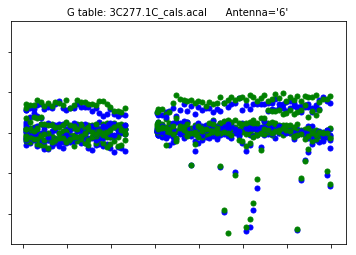

Show log 2018-11-29 12:59:15	INFO	plotcal::::	
 2018-11-29 12:59:15	INFO	plotcal::::+	##########################################
 2018-11-29 12:59:15	INFO	plotcal::::+	##### Begin Task: plotcal #####
 2018-11-29 12:59:15	INFO	plotcal::::	plotcal(caltable="3C277.1C_cals.acal",xaxis="time",yaxis="amp",poln="",field="1300+580",
 2018-11-29 12:59:15	INFO	plotcal::::+ antenna="",spw="",timerange="",subplot=611,overplot=False,
 2018-11-29 12:59:15	INFO	plotcal::::+ clearpanel="Auto",iteration="antenna",plotrange=[-1, -1, 0.5, 1.5],showflags=False,plotsymbol="o",
 2018-11-29 12:59:15	INFO	plotcal::::+ plotcolor="blue",markersize=5.0,fontsize=10.0,showgui=True,figfile="3C277.1C_1300+580_cals.acal.png")
 2018-11-29 12:59:15	INFO	tableplot::setgui	Switching to GUI mode. All current plots will be reset.
 2018-11-29 12:59:15	INFO	plotcal::createCalTab Detected a NewCalTable!
 2018-11-29 12:59:15	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:59:15	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:59:15	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:59:15	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:59:15	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:59:15	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:59:15	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:59:15	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:59:16	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:59:16	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:59:16	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 12:59:16	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 12:59:16	INFO	FlagVersion::saveFlagVersion	Saving plot to file 3C277.1C_1300+580_cals.acal.png
 2018-11-29 12:59:16	INFO	plotcal::::	##### End Task: plotcal #####
 2018-11-29 12:59:16	INFO	plotcal::::+	##########################################

In [25]:
plotcal(caltable = prefix+'_cals.acal',
    field = '1300+580',
    antenna = '',
    subplot = 611,
    iteration ='antenna',
    xaxis = 'time',
    yaxis = 'amp',
    plotrange = [-1, -1, 0.5, 1.5],
    figfile = prefix+'_1300+580_cals.acal.png')

## Polarization calibration

The phase reference source was observed over a wide hour angle range and it is point-like. We can use it to solve simultaneously for its intrinsic polarization and for leakage between the receiver feeds in orthogonal polarizations, using polcal. The parallactic angle correction (to allow for the rotation of alt-az feeds during tracking) is also derived. preavg defines the averaging intervals over which the parallactic angle correction is applied. 

In [26]:
default(polcal)
polcal(vis = msfile,
    caltable = prefix+'_phref.dcal',
    field = '1300+580',
    selectdata = False,
    solint = 'inf',   
    combine = 'scan',
    preavg = 120.0,  
    refant = '5',    
    poltype = 'D+QU',
    minsnr = 3.0,
    minblperant = 3,
    gaintable = [prefix+'_cals.phcal', prefix+'_cals.acal'])

Show log 2018-11-29 12:59:16	INFO	default:::: ####### Setting values to default for task: polcal #######
 2018-11-29 12:59:16	INFO	polcal::::	
 2018-11-29 12:59:16	INFO	polcal::::+	##########################################
 2018-11-29 12:59:16	INFO	polcal::::+	##### Begin Task: polcal #####
 2018-11-29 12:59:16	INFO	polcal::::	polcal(vis="3C277.1C.ms",caltable="3C277.1C_phref.dcal",field="1300+580",spw="",intent="",
 2018-11-29 12:59:16	INFO	polcal::::+ selectdata=False,timerange="",uvrange="",antenna="",scan="",
 2018-11-29 12:59:16	INFO	polcal::::+ observation="",msselect="",solint="inf",combine="scan",preavg=120.0,
 2018-11-29 12:59:16	INFO	polcal::::+ refant="5",minblperant=3,minsnr=3.0,poltype="D+QU",smodel=[],
 2018-11-29 12:59:16	INFO	polcal::::+ append=False,docallib=False,callib="",gaintable=['3C277.1C_cals.phcal', '3C277.1C_cals.acal'],gainfield=[''],
 2018-11-29 12:59:16	INFO	polcal::::+ interp=[],spwmap=[])
 2018-11-29 12:59:16	INFO	polcal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2018-11-29 12:59:16	INFO	polcal::calibrater::open	Opening MS: 3C277.1C.ms for calibration.
 2018-11-29 12:59:16	INFO	polcal::Calibrater::	Initializing nominal selection to the whole MS.
 2018-11-29 12:59:16	INFO	polcal::::	NB: gaincal automatically excludes auto-correlations.
 2018-11-29 12:59:16	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2018-11-29 12:59:16	INFO	calibrater::reset	Reseting solve/apply state
 2018-11-29 12:59:16	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2018-11-29 12:59:16	INFO	Calibrater::selectvis+ Selecting on field: '1300+580'
 2018-11-29 12:59:16	INFO	Calibrater::selectvis+ Selecting with TaQL: 'ANTENNA1!=ANTENNA2'
 2018-11-29 12:59:16	INFO	Calibrater::selectvis	By selection 210236 rows are reduced to 11785
 2018-11-29 12:59:16	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2018-11-29 12:59:16	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect='ANTENNA1!=ANTENNA2'
 2018-11-29 12:59:16	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 12:59:16	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 12:59:16	INFO	Calibrater::setapply(type, applypar)	. G Jones: table=3C277.1C_cals.phcal select= interp=linear spwmap=[-1] calWt=true
 2018-11-29 12:59:16	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 12:59:16	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 12:59:16	INFO	Calibrater::setapply(type, applypar)	. G Jones: table=3C277.1C_cals.acal select= interp=linear spwmap=[-1] calWt=true
 2018-11-29 12:59:16	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 12:59:16	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 12:59:16	INFO	Calibrater::setapply(type, applypar)	. P Jones 
 2018-11-29 12:59:16	INFO	calibrater::setsolve	Beginning setsolve--(MSSelection version)-------
 2018-11-29 12:59:16	INFO	Calibrater::setsolve	Arranging to SOLVE:
 2018-11-29 12:59:16	INFO Will solve for source polarization (Q,U)
 2018-11-29 12:59:16	INFO Using only cross-hand data for instrumental polarization solution.
 2018-11-29 12:59:16	INFO	Calibrater::setsolve	. D Jones: table=3C277.1C_phref.dcal append=false solint=inf refantmode='flex' refant='5' minsnr=3 apmode=AP solnorm=false
 2018-11-29 12:59:16	INFO	calibrater::solve	Beginning solve-----------------------------
 2018-11-29 12:59:16	INFO	Calibrater::solve	The following calibration terms are arranged for apply:
 2018-11-29 12:59:16	INFO	Calibrater::solve	. G Jones: table=3C277.1C_cals.phcal select= interp=linear spwmap=[-1] calWt=true
 2018-11-29 12:59:16	INFO	Calibrater::solve	. G Jones: table=3C277.1C_cals.acal select= interp=linear spwmap=[-1] calWt=true
 2018-11-29 12:59:16	INFO	Calibrater::solve	. P Jones 
 2018-11-29 12:59:16	INFO	Calibrater::

Inspect the solutions in the logger or use

```
caltable=prefix+'_phref.dcal'
listcal() 
```

The logger shows

polcal	Fractional polarization solution for 1300+580 (spw = 0): : Q = 0.0343205, U = -0.01451  (P = 0.0372617, X = -11.4588 deg)
...
polcal	  Ant=1: R: A=0.04847    P=-19.26   ; L: A=0.04227    P=-90.43  
polcal	  Ant=2: R: A=0.1035     P=-151.6   ; L: A=0.01853    P=-87.4   
polcal	  Ant=3: R: A=0.04337    P=-47.11   ; L: A=0.04684    P=-92.62  
polcal	  Ant=4: R: A=0.026      P=24.81    ; L: A=0.03879    P=-135.4  
polcal	  Ant=5: R: A=0          P=0        ; L: A=0.02193    P=-67.9   
polcal	  Ant=6: R: A=0.04473    P=-121.9   ; L: A=0.01694    P=51.1   

The source polarization is expected to be a few percent; I got P/I = 0.0373/0.426 (using the value of P above and the total flux density I from fluxscale). All amplitude (A) solutions should be less than 10% At present, the origin of phase, and hence the polarization angle, is arbitrary. This is corrected using the known polarization angle of 3C286. We apply the phase and polarization leakage solutions and use the model of its I Q U and V previously set. We rely on the amplitude being stable during the short (c. half an hour) observation, to avoid needing to use a model for amplitude calibration, since the polarization is dominated by the compact core.



In [27]:
default(polcal)
polcal(vis = msfile,
    caltable = prefix+'_3C286.pacal',
    field = '3C286',
    selectdata = False,
    solint = 'inf',     # entire 'combine' intervals = scan length, here.
    combine = 'scan',
    preavg = 120.0,  # interval at which to apply ||actic angle
    refant = '5',    # pick antenna with good data near array centre           
    gaintable = [prefix+'_cals.phcal', prefix+'_phref.dcal'],
    poltype = 'Xf')

# The tutorial says poltype = 'X' but I get an error and it won't solve.
# Logger says Mean position angle offset solution for 3C286 (spw = 0) = -85.435 deg.

Show log 2018-11-29 12:59:18	INFO	default:::: ####### Setting values to default for task: polcal #######
 2018-11-29 12:59:18	INFO	polcal::::	
 2018-11-29 12:59:18	INFO	polcal::::+	##########################################
 2018-11-29 12:59:18	INFO	polcal::::+	##### Begin Task: polcal #####
 2018-11-29 12:59:18	INFO	polcal::::	polcal(vis="3C277.1C.ms",caltable="3C277.1C_3C286.pacal",field="3C286",spw="",intent="",
 2018-11-29 12:59:18	INFO	polcal::::+ selectdata=False,timerange="",uvrange="",antenna="",scan="",
 2018-11-29 12:59:18	INFO	polcal::::+ observation="",msselect="",solint="inf",combine="scan",preavg=120.0,
 2018-11-29 12:59:18	INFO	polcal::::+ refant="5",minblperant=4,minsnr=3.0,poltype="Xf",smodel=[],
 2018-11-29 12:59:18	INFO	polcal::::+ append=False,docallib=False,callib="",gaintable=['3C277.1C_cals.phcal', '3C277.1C_phref.dcal'],gainfield=[''],
 2018-11-29 12:59:18	INFO	polcal::::+ interp=[],spwmap=[])
 2018-11-29 12:59:18	INFO	polcal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2018-11-29 12:59:18	INFO	polcal::calibrater::open	Opening MS: 3C277.1C.ms for calibration.
 2018-11-29 12:59:18	INFO	polcal::Calibrater::	Initializing nominal selection to the whole MS.
 2018-11-29 12:59:18	INFO	polcal::::	NB: gaincal automatically excludes auto-correlations.
 2018-11-29 12:59:18	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2018-11-29 12:59:18	INFO	calibrater::reset	Reseting solve/apply state
 2018-11-29 12:59:18	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2018-11-29 12:59:18	INFO	Calibrater::selectvis+ Selecting on field: '3C286'
 2018-11-29 12:59:18	INFO	Calibrater::selectvis+ Selecting with TaQL: 'ANTENNA1!=ANTENNA2'
 2018-11-29 12:59:18	INFO	Calibrater::selectvis	By selection 210236 rows are reduced to 31538
 2018-11-29 12:59:18	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2018-11-29 12:59:18	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect='ANTENNA1!=ANTENNA2'
 2018-11-29 12:59:18	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 12:59:18	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 12:59:19	INFO	Calibrater::setapply(type, applypar)	. G Jones: table=3C277.1C_cals.phcal select= interp=linear spwmap=[-1] calWt=true
 2018-11-29 12:59:19	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 12:59:19	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 12:59:19	INFO	Calibrater::setapply(type, applypar)	. D Jones: table=3C277.1C_phref.dcal select= interp=linear spwmap=[-1] calWt=false
 2018-11-29 12:59:19	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 12:59:19	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 12:59:19	INFO	Calibrater::setapply(type, applypar)	. P Jones 
 2018-11-29 12:59:19	INFO	calibrater::setsolve	Beginning setsolve--(MSSelection version)-------
 2018-11-29 12:59:19	INFO	Calibrater::setsolve	Arranging to SOLVE:
 2018-11-29 12:59:19	INFO . (Ignoring specified refant for Xf Jones solve.)
 2018-11-29 12:59:19	INFO	Calibrater::setsolve	. Xf Jones: table=3C277.1C_3C286.pacal append=false solint=inf,none refantmode='flex' refant='none' minsnr=3 apmode=AP solnorm=false
 2018-11-29 12:59:19	INFO	calibrater::solve	Beginning solve-----------------------------
 2018-11-29 12:59:19	INFO	Calibrater::solve	The following calibration terms are arranged for apply:
 2018-11-29 12:59:19	INFO	Calibrater::solve	. G Jones: table=3C277.1C_cals.phcal select= interp=linear spwmap=[-1] calWt=true
 2018-11-29 12:59:19	INFO	Calibrater::solve	. D Jones: table=3C277.1C_phref.dcal select= interp=linear spwmap=[-1] calWt=false
 2018-11-29 12:59:19	INFO	Calibrater::solve	. P Jones 
 2018-11-29 12:59:19	INFO	Calibrater::solve	The following calibration term is arranged for solve:
 2018-11-29 12:5

The polarization angle correction is reported in the logger.

polcal Position angle offset solution for 3C286 (spw = 0) = 33.9224 deg. 

## Apply the calibration and prepare for imaging

Apply the time-dependent phase and incremental phase plus amplitude solutions to the target and the phase-reference source using applycal. As the MERLIN antennas have different sensitivities we use calwt=False (so that data for the less sensitive antennas are not given too small a weight to be included properly in self-calibration). 

In [28]:
default(applycal)
applycal(vis = msfile,
    gaintable = [prefix+'_cals.phcal', prefix+'_cals.acal', prefix+'_phref.dcal', prefix+'_3C286.pacal'],
    field = '1300+580,3C277.1',
    calwt = False,   
    parang = True)

Show log 2018-11-29 12:59:23	INFO	default:::: ####### Setting values to default for task: applycal #######
 2018-11-29 12:59:23	INFO	applycal::::	
 2018-11-29 12:59:23	INFO	applycal::::+	##########################################
 2018-11-29 12:59:23	INFO	applycal::::+	##### Begin Task: applycal #####
 2018-11-29 12:59:23	INFO	applycal::::	applycal(vis="3C277.1C.ms",field="1300+580,3C277.1",spw="",intent="",selectdata=True,
 2018-11-29 12:59:23	INFO	applycal::::+ timerange="",uvrange="",antenna="",scan="",observation="",
 2018-11-29 12:59:23	INFO	applycal::::+ msselect="",docallib=False,callib="",gaintable=['3C277.1C_cals.phcal', '3C277.1C_cals.acal', '3C277.1C_phref.dcal', '3C277.1C_3C286.pacal'],gainfield=[],
 2018-11-29 12:59:23	INFO	applycal::::+ interp=[],spwmap=[],calwt=False,parang=True,applymode="",
 2018-11-29 12:59:23	INFO	applycal::::+ flagbackup=True)
 2018-11-29 12:59:23	INFO	applycal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2018-11-29 12:59:23	INFO	applycal::calibrater::open	Opening MS: 3C277.1C.ms for calibration.
 2018-11-29 12:59:23	INFO	applycal::VisSetUtil::addScrCols	Adding CORRECTED_DATA column(s).
 2018-11-29 12:59:24	INFO	applycal::Calibrater::	Initializing nominal selection to the whole MS.
 2018-11-29 12:59:24	INFO	applycal::AgentFlagger::open	Table type is Measurement Set
 2018-11-29 12:59:24	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called applycal_1
 2018-11-29 12:59:24	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2018-11-29 12:59:24	INFO	calibrater::reset	Reseting solve/apply state
 2018-11-29 12:59:24	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2018-11-29 12:59:24	INFO	Calibrater::selectvis+ Selecting on field: '1300+580,3C277.1'
 2018-11-29 12:59:24	INFO	Calibrater::selectvis	By selection 210236 rows are reduced to 72700
 2018-11-29 12:59:24	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2018-11-29 12:59:24	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect=''
 2018-11-29 12:59:24	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 12:59:24	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 12:59:24	INFO	Calibrater::setapply(type, applypar)	. G Jones: table=3C277.1C_cals.phcal select= interp=linear spwmap=[-1] calWt=false
 2018-11-29 12:59:24	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 12:59:24	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 12:59:24	INFO	Calibrater::setapply(type, applypar)	. G Jones: table=3C277.1C_cals.acal select= interp=linear spwmap=[-1] calWt=false
 2018-11-29 12:59:24	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 12:59:24	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 12:59:24	INFO	Calibrater::setapply(type, applypar)	. D Jones: table=3C277.1C_phref.dcal select= interp=linear spwmap=[-1] calWt=false
 2018-11-29 12:59:24	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 12:59:24	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 12:59:24	INFO	Calibrater::setapply(type, applypar)	. Xf Jones: table=3C277.1C_3C286.pacal select= interp=linear,linear spwmap=[-1] calWt=false
 2018-11-29 12:59:24	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 12:59:24	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 12:59:24	INFO	Calibrater::setapply(type, applypar)	. P Jones 
 2018-11-29 12:59:24	INFO	calibrater::correct	Beginning correct---------------------------
 2018-11-29 12:59:24	INFO	Calibrater::correct2 (VI2/VB2)	The following calibration terms are arranged for apply:
 2018-11-29 12:59:24	INFO	Calibrater::correct2 (VI2/VB2)	. G Jones: table=3C277.1C_cals.phcal select= interp=linear spwmap=[-

 No amplitude calibration table for 3C286: 

In [29]:
applycal(vis = msfile,
    gaintable = [prefix+'_cals.phcal',prefix+'_phref.dcal',prefix+'_3C286.pacal'],
    field = '3C286',
    calwt = False,   
    parang = True)

Show log 2018-11-29 12:59:28	INFO	applycal::::	
 2018-11-29 12:59:28	INFO	applycal::::+	##########################################
 2018-11-29 12:59:28	INFO	applycal::::+	##### Begin Task: applycal #####
 2018-11-29 12:59:28	INFO	applycal::::	applycal(vis="3C277.1C.ms",field="3C286",spw="",intent="",selectdata=True,
 2018-11-29 12:59:28	INFO	applycal::::+ timerange="",uvrange="",antenna="",scan="",observation="",
 2018-11-29 12:59:28	INFO	applycal::::+ msselect="",docallib=False,callib="",gaintable=['3C277.1C_cals.phcal', '3C277.1C_phref.dcal', '3C277.1C_3C286.pacal'],gainfield=[],
 2018-11-29 12:59:28	INFO	applycal::::+ interp=[],spwmap=[],calwt=False,parang=True,applymode="",
 2018-11-29 12:59:28	INFO	applycal::::+ flagbackup=True)
 2018-11-29 12:59:28	INFO	applycal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2018-11-29 12:59:28	INFO	applycal::calibrater::open	Opening MS: 3C277.1C.ms for calibration.
 2018-11-29 12:59:28	INFO	applycal::Calibrater::	Initializing nominal selection to the whole MS.
 2018-11-29 12:59:28	INFO	applycal::AgentFlagger::open	Table type is Measurement Set
 2018-11-29 12:59:28	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called applycal_2
 2018-11-29 12:59:28	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2018-11-29 12:59:28	INFO	calibrater::reset	Reseting solve/apply state
 2018-11-29 12:59:28	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2018-11-29 12:59:28	INFO	Calibrater::selectvis+ Selecting on field: '3C286'
 2018-11-29 12:59:28	INFO	Calibrater::selectvis	By selection 210236 rows are reduced to 31538
 2018-11-29 12:59:28	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2018-11-29 12:59:28	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect=''
 2018-11-29 12:59:28	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 12:59:28	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 12:59:28	INFO	Calibrater::setapply(type, applypar)	. G Jones: table=3C277.1C_cals.phcal select= interp=linear spwmap=[-1] calWt=false
 2018-11-29 12:59:28	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 12:59:28	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 12:59:28	INFO	Calibrater::setapply(type, applypar)	. D Jones: table=3C277.1C_phref.dcal select= interp=linear spwmap=[-1] calWt=false
 2018-11-29 12:59:28	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 12:59:28	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 12:59:28	INFO	Calibrater::setapply(type, applypar)	. Xf Jones: table=3C277.1C_3C286.pacal select= interp=linear,linear spwmap=[-1] calWt=false
 2018-11-29 12:59:28	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 12:59:28	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 12:59:28	INFO	Calibrater::setapply(type, applypar)	. P Jones 
 2018-11-29 12:59:28	INFO	calibrater::correct	Beginning correct---------------------------
 2018-11-29 12:59:28	INFO	Calibrater::correct2 (VI2/VB2)	The following calibration terms are arranged for apply:
 2018-11-29 12:59:28	INFO	Calibrater::correct2 (VI2/VB2)	. G Jones: table=3C277.1C_cals.phcal select= interp=linear spwmap=[-1] calWt=false
 2018-11-29 12:59:28	INFO	Calibrater::correct2 (VI2/VB2)	. D Jones: table=3C277.1C_phref.dcal select= interp=linear spwmap=[-1] calWt=false
 2018-11-29 12:59:28	INFO	Calibrater::correct2 (VI2/VB2)	. Xf Jones: table=3C277.1C_3C286.pacal select= interp=linear,linear spwmap=[-1] calWt=false
 2018-11-29 12:59:28	INFO	Calibrater::correct2 (VI2/VB2)	. P Jones 
 2018-11-29 12:59:28	WARN	CTPatchedInterp::interpolate	In caltable 3C277.1C_3C286.pacal (Xf Jones):
 2018-11-29 12:59:28	WARN	CTPatchedInterp::interpolate+ Insufficient solution channel s

 This fills the CORRECTED data column with visibilities multiplied by the various calibration factors. split out the target (further imaging and self-calibration are quicker and simpler using a single-source file): 

In [30]:
default(split)
split(vis = msfile,
    datacolumn = 'corrected',
    outputvis = '3C277.1C.split.ms',
    field = '3C277.1')

True

Show log 2018-11-29 12:59:31	INFO	default:::: ####### Setting values to default for task: split #######
 2018-11-29 12:59:31	INFO	split::::	
 2018-11-29 12:59:31	INFO	split::::+	##########################################
 2018-11-29 12:59:31	INFO	split::::+	##### Begin Task: split #####
 2018-11-29 12:59:31	INFO	split::::	split(vis="3C277.1C.ms",outputvis="3C277.1C.split.ms",keepmms=True,field="3C277.1",spw="",
 2018-11-29 12:59:31	INFO	split::::+ scan="",antenna="",correlation="",timerange="",intent="",
 2018-11-29 12:59:31	INFO	split::::+ array="",uvrange="",observation="",feed="",datacolumn="corrected",
 2018-11-29 12:59:31	INFO	split::::+ keepflags=True,width=1,timebin="0s",combine="")
 2018-11-29 12:59:31	INFO	MSTransformManager::parseMsSpecParams	Input file name is 3C277.1C.ms
 2018-11-29 12:59:31	INFO	MSTransformManager::parseMsSpecParams	Data column is CORRECTED
 2018-11-29 12:59:31	INFO	MSTransformManager::parseMsSpecParams	Output file name is 3C277.1C.split.ms
 2018-11-29 12:59:31	INFO	MSTransformManager::parseDataSelParams	field selection is 3C277.1
 2018-11-29 12:59:31	INFO	MSTransformManager::colCheckInfo	Adding DATA column to output MS from input CORRECTED_DATA column
 2018-11-29 12:59:31	INFO	MSTransformManager::initDataSelectionParams	Selected Fields Ids are [11]
 2018-11-29 12:59:31	INFO	MSTransformManager::open	Select data
 2018-11-29 12:59:31	INFO	MSTransformManager::createOutputMSStructure	Create output MS structure
 2018-11-29 12:59:31	INFO	MSTransformDataHandler::makeSelection	60915 out of 210236 rows are going to be considered due to the selection criteria.
 2018-11-29 12:59:33	INFO	MSTransformManager::checkFillWeightSpectrum	Optional column WEIGHT_SPECTRUM found in input MS will be written to output MS
 2018-11-29 12:59:34	INFO	split::::	CASA Version 5.4.0-68 
 2018-11-29 12:59:34	INFO	split::::	
 2018-11-29 12:59:35	INFO	split::::	##### End Task: split #####
 2018-11-29 12:59:35	INFO	split::::+	##########################################

 Inspect the calibrated 3C277.1 data. 

In [31]:
default(plotms)
plotms(vis = '3C277.1C.split.ms',
    gridrows = 5,
    xaxis = 'time',
    yaxis = 'amp',
    ydatacolumn = 'data',
    correlation = 'RR,LL',
    coloraxis = 'corr',
    iteraxis = 'baseline',
    field = '3C277.1',
    plotfile = '3C277.1.split_amp_time.png',
    expformat = 'png')

False

Show log 2018-11-29 12:59:36	INFO	default:::: ####### Setting values to default for task: plotms #######
 2018-11-29 12:59:36	INFO	plotms::::	
 2018-11-29 12:59:36	INFO	plotms::::+	##########################################
 2018-11-29 12:59:36	INFO	plotms::::+	##### Begin Task: plotms #####
 2018-11-29 12:59:36	INFO	plotms::::	plotms(vis="3C277.1C.split.ms",gridrows=5,gridcols=1,rowindex=0,colindex=0,
 2018-11-29 12:59:36	INFO	plotms::::+ plotindex=0,xaxis="time",xdatacolumn="",yaxis="amp",ydatacolumn="data",
 2018-11-29 12:59:36	INFO	plotms::::+ yaxislocation="",selectdata=True,field="3C277.1",spw="",timerange="",
 2018-11-29 12:59:36	INFO	plotms::::+ uvrange="",antenna="",scan="",correlation="RR,LL",array="",
 2018-11-29 12:59:36	INFO	plotms::::+ observation="",intent="",feed="",msselect="",averagedata=True,
 2018-11-29 12:59:36	INFO	plotms::::+ avgchannel="",avgtime="",avgscan=False,avgfield=False,avgbaseline=False,
 2018-11-29 12:59:36	INFO	plotms::::+ avgantenna=False,avgspw=False,scalar=False,transform=True,freqframe="",
 2018-11-29 12:59:36	INFO	plotms::::+ restfreq="",veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,
 2018-11-29 12:59:36	INFO	plotms::::+ extchannel=False,iteraxis="baseline",xselfscale=False,yselfscale=False,xsharedaxis=False,
 2018-11-29 12:59:36	INFO	plotms::::+ ysharedaxis=False,customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",
 2018-11-29 12:59:36	INFO	plotms::::+ symbolfill="fill",symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",
 2018-11-29 12:59:36	INFO	plotms::::+ flaggedsymbolsize=2,flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,plotrange=[],
 2018-11-29 12:59:36	INFO	plotms::::+ title="",titlefont=0,xlabel="",xaxisfont=0,ylabel="",
 2018-11-29 12:59:36	INFO	plotms::::+ yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",majorcolor="B0B0B0",
 2018-11-29 12:59:36	INFO	plotms::::+ showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",showlegend=False,
 2018-11-29 12:59:36	INFO	plotms::::+ legendposition="",plotfile="3C277.1.split_amp_time.png",expformat="png",verbose=True,exprange="",
 2018-11-29 12:59:36	INFO	plotms::::+ highres=False,dpi=-1,width=-1,height=-1,overwrite=False,
 2018-11-29 12:59:36	INFO	plotms::::+ showgui=False,clearplots=True,callib=[''],headeritems="",showatm=False,
 2018-11-29 12:59:36	INFO	plotms::::+ showtsky=False)
 2018-11-29 12:59:36	SEVERE	plotms::::	ERROR: DISPLAY environment variable is not set! Cannot run plotms.
 2018-11-29 12:59:36	INFO	plotms::::	##### End Task: plotms #####
 2018-11-29 12:59:36	INFO	plotms::::+	##########################################

In [32]:
plotms(vis = '3C277.1C.split.ms',
    gridrows = 5,
    xaxis = 'time',
    yaxis = 'phase',
    ydatacolumn = 'data',
    correlation = 'RR,LL',
    coloraxis = 'corr',
    iteraxis = 'baseline',
    plotrange = [-1,-1,-180,180],
    field = '3C277.1',
    plotfile = '3C277.1.split_phase_time.png',
    expformat = 'png')

False

Show log 2018-11-29 12:59:36	INFO	plotms::::	
 2018-11-29 12:59:36	INFO	plotms::::+	##########################################
 2018-11-29 12:59:36	INFO	plotms::::+	##### Begin Task: plotms #####
 2018-11-29 12:59:36	INFO	plotms::::	plotms(vis="3C277.1C.split.ms",gridrows=5,gridcols=1,rowindex=0,colindex=0,
 2018-11-29 12:59:36	INFO	plotms::::+ plotindex=0,xaxis="time",xdatacolumn="",yaxis="phase",ydatacolumn="data",
 2018-11-29 12:59:36	INFO	plotms::::+ yaxislocation="",selectdata=True,field="3C277.1",spw="",timerange="",
 2018-11-29 12:59:36	INFO	plotms::::+ uvrange="",antenna="",scan="",correlation="RR,LL",array="",
 2018-11-29 12:59:36	INFO	plotms::::+ observation="",intent="",feed="",msselect="",averagedata=True,
 2018-11-29 12:59:36	INFO	plotms::::+ avgchannel="",avgtime="",avgscan=False,avgfield=False,avgbaseline=False,
 2018-11-29 12:59:36	INFO	plotms::::+ avgantenna=False,avgspw=False,scalar=False,transform=True,freqframe="",
 2018-11-29 12:59:36	INFO	plotms::::+ restfreq="",veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,
 2018-11-29 12:59:36	INFO	plotms::::+ extchannel=False,iteraxis="baseline",xselfscale=False,yselfscale=False,xsharedaxis=False,
 2018-11-29 12:59:36	INFO	plotms::::+ ysharedaxis=False,customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",
 2018-11-29 12:59:36	INFO	plotms::::+ symbolfill="fill",symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",
 2018-11-29 12:59:36	INFO	plotms::::+ flaggedsymbolsize=2,flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,plotrange=[-1, -1, -180, 180],
 2018-11-29 12:59:36	INFO	plotms::::+ title="",titlefont=0,xlabel="",xaxisfont=0,ylabel="",
 2018-11-29 12:59:36	INFO	plotms::::+ yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",majorcolor="B0B0B0",
 2018-11-29 12:59:36	INFO	plotms::::+ showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",showlegend=False,
 2018-11-29 12:59:36	INFO	plotms::::+ legendposition="",plotfile="3C277.1.split_phase_time.png",expformat="png",verbose=True,exprange="",
 2018-11-29 12:59:36	INFO	plotms::::+ highres=False,dpi=-1,width=-1,height=-1,overwrite=False,
 2018-11-29 12:59:36	INFO	plotms::::+ showgui=False,clearplots=True,callib=[''],headeritems="",showatm=False,
 2018-11-29 12:59:36	INFO	plotms::::+ showtsky=False)
 2018-11-29 12:59:36	SEVERE	plotms::::	ERROR: DISPLAY environment variable is not set! Cannot run plotms.
 2018-11-29 12:59:36	INFO	plotms::::	##### End Task: plotms #####
 2018-11-29 12:59:36	INFO	plotms::::+	##########################################


Where there are no solutions from the phase reference, the data are already flagged. It is quite hard to see bad data on the long baselines so you might not be able to flag these but any obviously isolated points can be flagged. Inspect phase also. After later self-calibration, you might have another look and edit remaining isolated points, use the zoom if necessary.

## Self calibration and imaging of the target

Image the target using clean. The longest baseline is 217 km and the wavelength is 6 cm. Use this to estimate the interferometer resolution and hence a suitable pixel size to give at least 3 pixels across the beam. A minimum image size of at least 512 pixels is needed for for adequate deconvolution of the rather extended dirty beam produced by the sparse MERLIN array. psfmode='hogbom' provides a large beam patch for deconvolving extended sidelobes. Note that if interactive=True you have to set box(es) yourself and double click in them to activate. Don't clean too far before self-calibration. Ignor warnings about not finding position of MERLIN 

In [33]:
default(clean)
clean(vis = '3C277.1C.split.ms',
    field = '3C277.1',
    imagename = '3C277.1C_clean1',
    cell = ['0.015arcsec', '0.015arcsec'],
    imsize = [512,512],
    psfmode = 'hogbom',
    imagermode = 'csclean',
    cyclefactor = 4,
    stokes = 'I',
#    interactive = True,
    niter = 1000,
    gain = 0.05,
    mask = '')

Show log 2018-11-29 12:59:36	INFO	default:::: ####### Setting values to default for task: clean #######
 2018-11-29 12:59:36	INFO	clean::::	
 2018-11-29 12:59:36	INFO	clean::::+	##########################################
 2018-11-29 12:59:36	INFO	clean::::+	##### Begin Task: clean #####
 2018-11-29 12:59:36	INFO	clean::::	clean(vis="3C277.1C.split.ms",imagename="3C277.1C_clean1",outlierfile="",field="3C277.1",spw="",
 2018-11-29 12:59:36	INFO	clean::::+ selectdata=True,timerange="",uvrange="",antenna="",scan="",
 2018-11-29 12:59:36	INFO	clean::::+ observation="",intent="",mode="mfs",resmooth=False,gridmode="",
 2018-11-29 12:59:36	INFO	clean::::+ wprojplanes=-1,facets=1,cfcache="cfcache.dir",rotpainc=5.0,painc=360.0,
 2018-11-29 12:59:36	INFO	clean::::+ aterm=True,psterm=False,mterm=True,wbawp=False,conjbeams=True,
 2018-11-29 12:59:36	INFO	clean::::+ epjtable="",interpolation="linear",niter=1000,gain=0.05,threshold="0.0mJy",
 2018-11-29 12:59:36	INFO	clean::::+ psfmode="hogbom",imagermode="csclean",ftmachine="mosaic",mosweight=False,scaletype="SAULT",
 2018-11-29 12:59:36	INFO	clean::::+ multiscale=[0],negcomponent=-1,smallscalebias=0.6,interactive=False,mask="",
 2018-11-29 12:59:36	INFO	clean::::+ nchan=-1,start=0,width=1,outframe="",veltype="radio",
 2018-11-29 12:59:36	INFO	clean::::+ imsize=[512, 512],cell=['0.015arcsec', '0.015arcsec'],phasecenter="",restfreq="",stokes="I",
 2018-11-29 12:59:36	INFO	clean::::+ weighting="natural",robust=0.0,uvtaper=False,outertaper=[''],innertaper=['1.0'],
 2018-11-29 12:59:36	INFO	clean::::+ modelimage="",restoringbeam=[''],pbcor=False,minpb=0.2,usescratch=False,
 2018-11-29 12:59:36	INFO	clean::::+ noise="1.0Jy",npixels=0,npercycle=100,cyclefactor=4,cyclespeedup=-1,
 2018-11-29 12:59:36	INFO	clean::::+ nterms=1,reffreq="",chaniter=False,flatnoise=True,allowchunk=False)
 2018-11-29 12:59:36	INFO	clean::::	nchan=-1 start=0 width=1
 2018-11-29 12:59:36	INFO	clean::::	Use default channelization for clean
 2018-11-29 12:59:36	INFO	clean::::	clean image: 3C277.1C_clean1
 2018-11-29 12:59:36	INFO	clean::::	FTMachine used is ft 
 2018-11-29 12:59:36	INFO	imager::setDataOnThisMS()	Performing selection on MeasurementSet : /scratch/condor_pool/condor/dir_199603/EDPNDmB3amtnCshSmpWEHpUqhcrQCoABFKDmT8zPDmABFKDmjCflRn/DIRAC_jIMCJbpilot/13840681/data/3C277.1C.split.ms
 2018-11-29 12:59:36	INFO	imager::setDataOnThisMS()	Selecting on fields : 0
 2018-11-29 12:59:36	INFO	imager::setDataOnThisMS()	Selecting on spectral windows expression :*
 2018-11-29 12:59:36	INFO	imager::setDataOnThisMS()	Selected all 60915 rows
 2018-11-29 12:59:36	INFO	imager::setDataOnThisMS()	Selected : [1 chans in spw 0]
 2018-11-29 12:59:36	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on 3C277.1C.split.ms...
 2018-11-29 12:59:36	INFO	imager::defineimage()	Defining image properties:nx=512 ny=512 cellx='0.015arcsec' celly='0.015arcsec' stokes=I' mode=MFS nchan=-1 start=0 step=1 spwids=[-1] fieldid=-1 facets=1 frame=5 distance='0'
 2018-11-29 12:59:36	INFO	imager::defineimage() phaseCenter='12:52:26.29, 56.34.19.49, ' mStart='Radialvelocity: 0' qStep='0 '' mFreqStart='Frequency: 0
 2018-11-29 12:59:37	INFO	Imager::setvp() Setting voltage pattern parameters
 2018-11-29 12:59:37	INFO	Imager::setvp() Sky position tolerance is 180 degrees
 2018-11-29 12:59:37	INFO	Imager::setvp() Using system default voltage patterns for each telescope
 2018-11-29 12:59:37	INFO	imager::makeimage() Calculating image (without full skyequation)
 2018-11-29 12:59:38	INFO	PBMath::initByDiameter PBMath init to Airy scaled to diameter = 25
 2018-11-29 12:59:39	INFO	Imager::setvp() Setting voltage pattern parameters
 2018-11-29 12:59:39	INFO	imager::weight()	Weighting MS: Imaging weights will be changed
 2018-11-29 12:59:39	INFO	imager::weight()	Natural weighting
 2018-11-29 12:59:39	INFO	clean::::	Used mask(s) : [''] to create mask image(s) : 3C277.1C_clean1.mask
 2018-11-29 12:59:39	INFO	imager::setoptions() Setting processing optio

You can save your boxes for future use. In the viewer menu, select

```Tools > Region in File ```

Enter

```Stokes IQUV```

Then draw your boxes (you cannot save boxes drawn prior to openning the Region in File dialogue). Click on Save and enter a name, e.g. clean1.rgn. To save the clean inputs for future, use saveinputs

```saveinputs ('clean', '3C277.1.clean1.saved')```

Check progress in the logger. In this instance we have let CASA fit the natural synthesised beam, the size is reported in the logger (and also recorded in the image header). The Clean model is left in the MS in the MODEL_DATA column. Use the viewer to load 3C277.1C_clean1.image as a raster map and use the 'data display options' to tweak it. You can access these via the spanner icon or the Data menu option Ajust. 

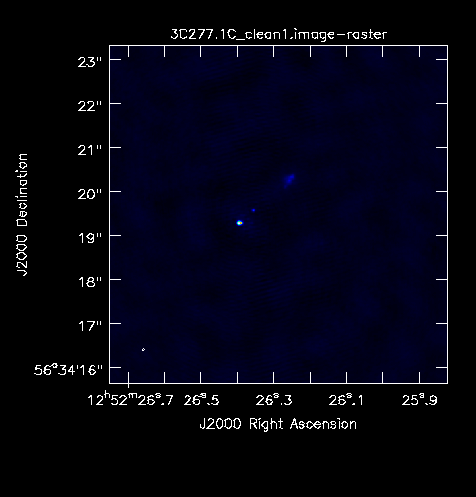

Show log 2018-11-29 13:00:43	INFO	viewer::::	
 2018-11-29 13:00:43	INFO	viewer::::+	##########################################
 2018-11-29 13:00:43	INFO	viewer::::+	##### Begin Task: viewer #####
 2018-11-29 13:00:43	INFO	viewer::::	viewer(infile="3C277.1C_clean1.image",displaytype="raster",channel=0,zoom=1,outfile="viewer_temp.png",
 2018-11-29 13:00:43	INFO	viewer::::+ outscale=1.0,outdpi=300,outformat="png",outlandscape=False,gui=False)
 2018-11-29 13:00:50	INFO	viewer::::	##### End Task: viewer #####
 2018-11-29 13:00:50	INFO	viewer::::+	##########################################

In [34]:
viewer('3C277.1C_clean1.image')

There are several ways to measure the noise and the peak. If you draw a box and double-click, the rms etc. will be displayed. To set the measurement in a variable (here called rms_target) use imstat, setting the limits to avoid the image. 

In [35]:
default(imstat)
noise_target = imstat(imagename = '3C277.1C_clean1.image',
                box = '20,20,492,120',
                stokes = 'I')

rms_target = noise_target['rms'][0]

print rms_target
# 0.000896490093248

0.000896490153603


Show log 2018-11-29 13:00:50	INFO	default:::: ####### Setting values to default for task: imstat #######
 2018-11-29 13:00:50	INFO	imstat::::	
 2018-11-29 13:00:50	INFO	imstat::::+	##########################################
 2018-11-29 13:00:50	INFO	imstat::::+	##### Begin Task: imstat #####
 2018-11-29 13:00:50	INFO	imstat::::	imstat(imagename="3C277.1C_clean1.image",axes=-1,region="",box="20,20,492,120",chans="",
 2018-11-29 13:00:50	INFO	imstat::::+ stokes="I",listit=True,verbose=True,mask="",stretch=False,
 2018-11-29 13:00:50	INFO	imstat::::+ logfile="",append=True,algorithm="classic",fence=-1,center="mean",
 2018-11-29 13:00:50	INFO	imstat::::+ lside=True,zscore=-1,maxiter=-1,clmethod="auto",niter=3)
 2018-11-29 13:00:50	INFO	imstat::CasacRegionManager::fromBCS	Using specified box(es) 20,20,492,120
 2018-11-29 13:00:50	INFO	imstat::image::statistics Determining stats for image 3C277.1C_clean1.image
 2018-11-29 13:00:50	INFO	imstat::ImageRegion::fromRecord	Selected bounding box : 
 2018-11-29 13:00:50	INFO	imstat::ImageRegion::fromRecord+ [20, 20, 0, 0] to [492, 120, 0, 0] (12:52:26.714, +56.34.15.948, I, 4.994e+09Hz to 12:52:25.858, +56.34.17.448, I, 4.994e+09Hz)
 2018-11-29 13:00:50	INFO	imstat::ImageStatsCalculator::_logStartup	Statistics calculated using Classic algorithm
 2018-11-29 13:00:50	INFO	imstat::ImageStatsCalculator::_logStartup	Regions --- 
 2018-11-29 13:00:50	INFO	imstat::ImageStatsCalculator::_logStartup -- bottom-left corner (pixel) [blc]: [20, 20, 0, 0]
 2018-11-29 13:00:50	INFO	imstat::ImageStatsCalculator::_logStartup -- top-right corner (pixel) [trc]: [492, 120, 0, 0]
 2018-11-29 13:00:50	INFO	imstat::ImageStatsCalculator::_logStartup -- bottom-left corner (world) [blcf]: 12:52:26.714, +56.34.15.948, I, 4.994e+09Hz
 2018-11-29 13:00:50	INFO	imstat::ImageStatsCalculator::_logStartup -- top-right corner (world) [trcf]: 12:52:25.858, +56.34.17.448, I, 4.994e+09Hz
 2018-11-29 13:00:50	INFO	imstat::::	Values --- 
 2018-11-29 13:00:50	INFO	imstat:::: -- flux density [flux]: 0.0110264 Jy
 2018-11-29 13:00:50	INFO	imstat:::: -- number of points [npts]: 47773
 2018-11-29 13:00:50	INFO	imstat:::: -- maximum value [max]: 0.0033153 Jy/beam
 2018-11-29 13:00:50	INFO	imstat:::: -- minimum value [min]: -0.00293972 Jy/beam
 2018-11-29 13:00:50	INFO	imstat:::: -- position of max value (pixel) [maxpos]: [314, 57, 0, 0]
 2018-11-29 13:00:50	INFO	imstat:::: -- position of min value (pixel) [minpos]: [223, 110, 0, 0]
 2018-11-29 13:00:50	INFO	imstat:::: -- position of max value (world) [maxposf]: 12:52:26.181, +56.34.16.503, I, 4.994e+09Hz
 2018-11-29 13:00:50	INFO	imstat:::: -- position of min value (world) [minposf]: 12:52:26.346, +56.34.17.298, I, 4.994e+09Hz
 2018-11-29 13:00:50	INFO	imstat:::: -- Sum of pixel values [sum]: 0.172533 Jy/beam
 2018-11-29 13:00:50	INFO	imstat:::: -- Sum of squared pixel values [sumsq]: 0.0383949 Jy/beam.Jy/beam
 2018-11-29 13:00:50	INFO	imstat::::	Statistics --- 
 2018-11-29 13:00:50	INFO	imstat:::: -- Mean of the pixel values [mean]: 3.61151e-06 Jy/beam
 2018-11-29 13:00:50	INFO	imstat:::: -- Variance of the pixel values : 8.03698e-07 Jy/beam
 2018-11-29 13:00:50	INFO	imstat:::: -- Standard deviation of the Mean [sigma]: 0.000896492 Jy/beam
 2018-11-29 13:00:50	INFO	imstat:::: -- Root mean square [rms]: 0.00089649 Jy/beam
 2018-11-29 13:00:50	INFO	imstat:::: -- Median of the pixel values [median]: -3.99356e-05 Jy/beam
 2018-11-29 13:00:50	INFO	imstat:::: -- Median of the deviations [medabsdevmed]: 0.000635372 Jy/beam
 2018-11-29 13:00:50	INFO	imstat:::: -- IQR [quartile]: 0.00127093 Jy/beam
 2018-11-29 13:00:50	INFO	imstat:::: -- First quartile [q1]: -0.0006391 Jy/beam
 2018-11-29 13:00:50	INFO	imstat:::: -- Third quartile [q3]: 0.000631833 Jy/beam
 2018-11-29 13:00:50	INFO	imstat::ImageStatsCalculator::statistics	Sum column unit = Jy/beam
 2018-11-29 13:00:50	INFO	imstat::ImageStatsCalculator::statistics+	Mean column unit = Jy/beam
 2018-11-29 13:00:50	INFO	imstat::ImageStatsCalculat

I got 0.00079 Jy. Use the menu Data>Load, select 3C277.1C_clean1.image as a contour image and use the 'data display options' to set the base contour level to the rms_noise and the relative contour levels to [-3,3,6,12,24,48,96]. 

First image of the target, contours at [-0.0025,0.0025, 0.005, 0.01, 0.02, 0.04, 0.08] Jy/beam

You can also overlay the Clean Components (3C277.1C_clean1.model) as a Marker Map using the Data > Open menu (set the x and y increments to 1.) Self-calibrate with gaincal using the model (the Fourier transform of the clean components) left in the MS. It is OK to selfcal in I if V is zero, which is usually the case at all but the highest resolution for extragalactic cm-wave radio continuum. 

In [36]:
default(gaincal)
gaincal(vis = '3C277.1C.split.ms',
    caltable = prefix+'_self1.phcal',
    field = '3C277.1',
    refant = '5',
    minblperant = 3,
    minsnr = 1,
    calmode = 'p',
    solint = '2min',
    parang = True)

Show log 2018-11-29 13:00:50	INFO	default:::: ####### Setting values to default for task: gaincal #######
 2018-11-29 13:00:50	INFO	gaincal::::	
 2018-11-29 13:00:50	INFO	gaincal::::+	##########################################
 2018-11-29 13:00:50	INFO	gaincal::::+	##### Begin Task: gaincal #####
 2018-11-29 13:00:50	INFO	gaincal::::	gaincal(vis="3C277.1C.split.ms",caltable="3C277.1C_self1.phcal",field="3C277.1",spw="",intent="",
 2018-11-29 13:00:50	INFO	gaincal::::+ selectdata=True,timerange="",uvrange="",antenna="",scan="",
 2018-11-29 13:00:50	INFO	gaincal::::+ observation="",msselect="",solint="2min",combine="",preavg=-1.0,
 2018-11-29 13:00:50	INFO	gaincal::::+ refant="5",refantmode="flex",minblperant=3,minsnr=1,solnorm=False,
 2018-11-29 13:00:50	INFO	gaincal::::+ gaintype="G",smodel=[],calmode="p",append=False,splinetime=3600.0,
 2018-11-29 13:00:50	INFO	gaincal::::+ npointaver=3,phasewrap=180.0,docallib=False,callib="",gaintable=[''],
 2018-11-29 13:00:50	INFO	gaincal::::+ gainfield=[''],interp=[],spwmap=[],parang=True)
 2018-11-29 13:00:50	INFO	gaincal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2018-11-29 13:00:50	INFO	gaincal::calibrater::open	Opening MS: 3C277.1C.split.ms for calibration.
 2018-11-29 13:00:50	INFO	gaincal::Calibrater::	Initializing nominal selection to the whole MS.
 2018-11-29 13:00:50	INFO	gaincal::::	NB: gaincal automatically excludes auto-correlations.
 2018-11-29 13:00:50	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2018-11-29 13:00:50	INFO	calibrater::reset	Reseting solve/apply state
 2018-11-29 13:00:50	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2018-11-29 13:00:50	INFO	Calibrater::selectvis+ Selecting on field: '3C277.1'
 2018-11-29 13:00:50	INFO	Calibrater::selectvis+ Selecting with TaQL: 'ANTENNA1!=ANTENNA2'
 2018-11-29 13:00:50	INFO	Calibrater::selectvis	Selection did not drop any rows
 2018-11-29 13:00:50	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2018-11-29 13:00:50	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect='ANTENNA1!=ANTENNA2'
 2018-11-29 13:00:50	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 13:00:50	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 13:00:50	INFO	Calibrater::setapply(type, applypar)	. P Jones 
 2018-11-29 13:00:50	INFO	calibrater::setsolve	Beginning setsolve--(MSSelection version)-------
 2018-11-29 13:00:50	INFO	Calibrater::setsolve	Arranging to SOLVE:
 2018-11-29 13:00:50	INFO	Calibrater::setsolve	. G Jones: table=3C277.1C_self1.phcal append=false solint=2min refantmode='flex' refant='5' minsnr=1 apmode=P solnorm=false
 2018-11-29 13:00:50	INFO	calibrater::solve	Beginning solve-----------------------------
 2018-11-29 13:00:50	INFO	Calibrater::solve	The following calibration terms are arranged for apply:
 2018-11-29 13:00:50	INFO	Calibrater::solve	. P Jones 
 2018-11-29 13:00:50	INFO	Calibrater::solve	The following calibration term is arranged for solve:
 2018-11-29 13:00:50	INFO	Calibrater::solve	. G Jones: table=3C277.1C_self1.phcal append=false solint=2min refantmode='flex' refant='5' minsnr=1 apmode=P solnorm=false
 2018-11-29 13:00:50	INFO	ChannelAverageTVI::parseConfiguration	Channel bin is [-1]
 2018-11-29 13:00:50	INFO	Calibrater::solve	For solint = 2min, found 296 solution intervals.
 2018-11-29 13:04:27	INFO	Calibrater::solve Found good G Jones solutions in 296 solution intervals.
 2018-11-29 13:04:27	INFO Applying refant: 5 refantmode = flex (hold alternate refants' phase constant) when refant flagged
 2018-11-29 13:04:27	INFO Enforcing apmode on solutions.
 2018-11-29 13:04:27	INFO Writing solutions to table: 3C277.1C_self1.phcal
 2018-11-29 13:04:55	INFO	calibrater::solve	Finished solving.
 2018-11-29 13:04:55	INFO	gaincal::::	Calibration solve statistics per spw: (expected/attempted/succeeded):
 2018-11-29 13:04:55

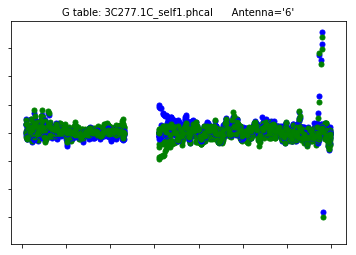

Show log 2018-11-29 13:04:56	INFO	plotcal::::	
 2018-11-29 13:04:56	INFO	plotcal::::+	##########################################
 2018-11-29 13:04:56	INFO	plotcal::::+	##### Begin Task: plotcal #####
 2018-11-29 13:04:56	INFO	plotcal::::	plotcal(caltable="3C277.1C_self1.phcal",xaxis="time",yaxis="phase",poln="",field="",
 2018-11-29 13:04:56	INFO	plotcal::::+ antenna="",spw="",timerange="",subplot=611,overplot=False,
 2018-11-29 13:04:56	INFO	plotcal::::+ clearpanel="Auto",iteration="antenna",plotrange=[-1, -1, -180, 180],showflags=False,plotsymbol="o",
 2018-11-29 13:04:56	INFO	plotcal::::+ plotcolor="blue",markersize=5.0,fontsize=10.0,showgui=True,figfile="3C277.1C_self1.phcal.png")
 2018-11-29 13:04:56	INFO	tableplot::setgui	Switching to GUI mode. All current plots will be reset.
 2018-11-29 13:04:56	INFO	plotcal::createCalTab Detected a NewCalTable!
 2018-11-29 13:04:56	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 13:04:56	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 13:04:56	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 13:04:56	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 13:04:56	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 13:04:56	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 13:04:56	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 13:04:56	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 13:04:56	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 13:04:56	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 13:04:56	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 13:04:56	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 13:04:56	INFO	FlagVersion::saveFlagVersion	Saving plot to file 3C277.1C_self1.phcal.png
 2018-11-29 13:04:56	INFO	plotcal::::	##### End Task: plotcal #####
 2018-11-29 13:04:56	INFO	plotcal::::+	##########################################

In [37]:
plotcal(caltable=prefix+'_self1.phcal',
    xaxis='time',
    yaxis='phase',
    subplot=611,
    iteration='antenna',
    plotrange = [-1, -1, -180, 180],
    figfile = '3C277.1C_self1.phcal.png')

 You expect to see just residual solutions; if they look OK use applycal. 

In [38]:
default(applycal)
applycal(vis = '3C277.1C.split.ms',
    gaintable = prefix+'_self1.phcal',
    field = '3C277.1',
    parang = True, 
    calwt = False)

Show log 2018-11-29 13:04:56	INFO	default:::: ####### Setting values to default for task: applycal #######
 2018-11-29 13:04:56	INFO	applycal::::	
 2018-11-29 13:04:56	INFO	applycal::::+	##########################################
 2018-11-29 13:04:56	INFO	applycal::::+	##### Begin Task: applycal #####
 2018-11-29 13:04:56	INFO	applycal::::	applycal(vis="3C277.1C.split.ms",field="3C277.1",spw="",intent="",selectdata=True,
 2018-11-29 13:04:56	INFO	applycal::::+ timerange="",uvrange="",antenna="",scan="",observation="",
 2018-11-29 13:04:56	INFO	applycal::::+ msselect="",docallib=False,callib="",gaintable="3C277.1C_self1.phcal",gainfield=[],
 2018-11-29 13:04:56	INFO	applycal::::+ interp=[],spwmap=[],calwt=False,parang=True,applymode="",
 2018-11-29 13:04:56	INFO	applycal::::+ flagbackup=True)
 2018-11-29 13:04:56	INFO	applycal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2018-11-29 13:04:56	INFO	applycal::calibrater::open	Opening MS: 3C277.1C.split.ms for calibration.
 2018-11-29 13:04:56	INFO	applycal::VisSetUtil::addScrCols	Adding CORRECTED_DATA column(s).
 2018-11-29 13:04:57	INFO	applycal::Calibrater::	Initializing nominal selection to the whole MS.
 2018-11-29 13:04:57	INFO	applycal::AgentFlagger::open	Table type is Measurement Set
 2018-11-29 13:04:57	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called applycal_1
 2018-11-29 13:04:57	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2018-11-29 13:04:57	INFO	calibrater::reset	Reseting solve/apply state
 2018-11-29 13:04:57	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2018-11-29 13:04:57	INFO	Calibrater::selectvis+ Selecting on field: '3C277.1'
 2018-11-29 13:04:57	INFO	Calibrater::selectvis	Selection did not drop any rows
 2018-11-29 13:04:57	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2018-11-29 13:04:57	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect=''
 2018-11-29 13:04:57	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 13:04:57	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 13:04:57	INFO	Calibrater::setapply(type, applypar)	. G Jones: table=3C277.1C_self1.phcal select= interp=linear spwmap=[-1] calWt=false
 2018-11-29 13:04:57	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 13:04:57	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 13:04:57	INFO	Calibrater::setapply(type, applypar)	. P Jones 
 2018-11-29 13:04:57	INFO	calibrater::correct	Beginning correct---------------------------
 2018-11-29 13:04:57	INFO	Calibrater::correct2 (VI2/VB2)	The following calibration terms are arranged for apply:
 2018-11-29 13:04:57	INFO	Calibrater::correct2 (VI2/VB2)	. G Jones: table=3C277.1C_self1.phcal select= interp=linear spwmap=[-1] calWt=false
 2018-11-29 13:04:57	INFO	Calibrater::correct2 (VI2/VB2)	. P Jones 
 2018-11-29 13:04:59	INFO	calibrater::correct	Finished correcting.
 2018-11-29 13:04:59	INFO	applycal::::	Calibration apply flagging statistics (among calibrateable spws):
 2018-11-29 13:04:59	INFO	applycal:::: Total selected visibilities (among calibrateable spws) = 243660
 2018-11-29 13:04:59	INFO	applycal:::: Flags:
 2018-11-29 13:04:59	INFO	applycal:::: G Jones: In: 1980 (0.812607732086%) --> Out: 2180 (0.894689321185%) (3C277.1C_self1.phcal)
 2018-11-29 13:04:59	INFO	applycal:::: P Jones: In: 2180 (0.894689321185%) --> Out: 2180 (0.894689321185%)
 2018-11-29 13:05:16	INFO	applycal::::	CASA Version 5.4.0-68 
 2018-11-29 13:05:17	INFO	applycal::::	
 2018-11-29 13:06:13	INFO	applycal::::	##### End Task: applycal #####
 2018-11-29 13:06:13	INFO	applycal::::+	##########################################

Clean, set threshold to the measured noise, rms_target Restore the saved inputs (3C277.1.clean1.saved is just a text file, you can view or edit it) using the python command execfile. If you saved your boxes give the file name as the argument of mask. You can change these interactively in the clean viewer. Restore the previous, saved clean inputs 

In [39]:
#execfile('3C277.1.clean1.saved')

Inspect and adapt the inputs, using the previous noise level as the minimum clean flux. You should stop cleaning when the minimum clean components have sidelobes fainter than the noise. You can calculate the stopping criteria more accurately by inspecting the sidelobe ratio of the dirty beam and comparing that with the expected final noise level. 

In [40]:
clean(vis = '3C277.1C.split.ms',
    field = '3C277.1',
    imagename = '3C277.1C_clean2',
    cell = ['0.015arcsec', '0.015arcsec'],
    imsize = [512,512],
    psfmode = 'hogbom',
    imagermode = 'csclean',
    cyclefactor = 4,
    stokes = 'I',
#    interactive = True,
    niter = 2000,
    gain = 0.05,
    threshold=str(rms_target)+'Jy')
#    mask = 'clean1.rgn')

saveinputs ('clean', '3C277.1.clean2.saved')

Show log 2018-11-29 13:06:13	INFO	clean::::	
 2018-11-29 13:06:13	INFO	clean::::+	##########################################
 2018-11-29 13:06:13	INFO	clean::::+	##### Begin Task: clean #####
 2018-11-29 13:06:13	INFO	clean::::	clean(vis="3C277.1C.split.ms",imagename="3C277.1C_clean2",outlierfile="",field="3C277.1",spw="",
 2018-11-29 13:06:13	INFO	clean::::+ selectdata=True,timerange="",uvrange="",antenna="",scan="",
 2018-11-29 13:06:13	INFO	clean::::+ observation="",intent="",mode="mfs",resmooth=False,gridmode="",
 2018-11-29 13:06:13	INFO	clean::::+ wprojplanes=-1,facets=1,cfcache="cfcache.dir",rotpainc=5.0,painc=360.0,
 2018-11-29 13:06:13	INFO	clean::::+ aterm=True,psterm=False,mterm=True,wbawp=False,conjbeams=True,
 2018-11-29 13:06:13	INFO	clean::::+ epjtable="",interpolation="linear",niter=2000,gain=0.05,threshold="0.000896490153603Jy",
 2018-11-29 13:06:13	INFO	clean::::+ psfmode="hogbom",imagermode="csclean",ftmachine="mosaic",mosweight=False,scaletype="SAULT",
 2018-11-29 13:06:13	INFO	clean::::+ multiscale=[0],negcomponent=-1,smallscalebias=0.6,interactive=False,mask=[],
 2018-11-29 13:06:13	INFO	clean::::+ nchan=-1,start=0,width=1,outframe="",veltype="radio",
 2018-11-29 13:06:13	INFO	clean::::+ imsize=[512, 512],cell=['0.015arcsec', '0.015arcsec'],phasecenter="",restfreq="",stokes="I",
 2018-11-29 13:06:13	INFO	clean::::+ weighting="natural",robust=0.0,uvtaper=False,outertaper=[''],innertaper=['1.0'],
 2018-11-29 13:06:13	INFO	clean::::+ modelimage="",restoringbeam=[''],pbcor=False,minpb=0.2,usescratch=False,
 2018-11-29 13:06:13	INFO	clean::::+ noise="1.0Jy",npixels=0,npercycle=100,cyclefactor=4,cyclespeedup=-1,
 2018-11-29 13:06:13	INFO	clean::::+ nterms=1,reffreq="",chaniter=False,flatnoise=True,allowchunk=False)
 2018-11-29 13:06:13	INFO	clean::::	nchan=-1 start=0 width=1
 2018-11-29 13:06:13	INFO	clean::::	Use default channelization for clean
 2018-11-29 13:06:13	INFO	clean::::	clean image: 3C277.1C_clean2
 2018-11-29 13:06:13	INFO	clean::::	FTMachine used is ft 
 2018-11-29 13:06:13	INFO	imager::setDataOnThisMS()	Performing selection on MeasurementSet : /scratch/condor_pool/condor/dir_199603/EDPNDmB3amtnCshSmpWEHpUqhcrQCoABFKDmT8zPDmABFKDmjCflRn/DIRAC_jIMCJbpilot/13840681/data/3C277.1C.split.ms
 2018-11-29 13:06:13	INFO	imager::setDataOnThisMS()	Selecting on fields : 0
 2018-11-29 13:06:13	INFO	imager::setDataOnThisMS()	Selecting on spectral windows expression :*
 2018-11-29 13:06:13	INFO	imager::setDataOnThisMS()	Selected all 60915 rows
 2018-11-29 13:06:13	INFO	imager::setDataOnThisMS()	Selected : [1 chans in spw 0]
 2018-11-29 13:06:13	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on 3C277.1C.split.ms...
 2018-11-29 13:06:13	INFO	imager::defineimage()	Defining image properties:nx=512 ny=512 cellx='0.015arcsec' celly='0.015arcsec' stokes=I' mode=MFS nchan=-1 start=0 step=1 spwids=[-1] fieldid=-1 facets=1 frame=5 distance='0'
 2018-11-29 13:06:13	INFO	imager::defineimage() phaseCenter='12:52:26.29, 56.34.19.49, ' mStart='Radialvelocity: 0' qStep='0 '' mFreqStart='Frequency: 0
 2018-11-29 13:06:25	INFO	Imager::setvp() Setting voltage pattern parameters
 2018-11-29 13:06:25	INFO	Imager::setvp() Sky position tolerance is 180 degrees
 2018-11-29 13:06:25	INFO	Imager::setvp() Using system default voltage patterns for each telescope
 2018-11-29 13:06:25	INFO	imager::makeimage() Calculating image (without full skyequation)
 2018-11-29 13:06:26	INFO	PBMath::initByDiameter PBMath init to Airy scaled to diameter = 25
 2018-11-29 13:06:28	INFO	Imager::setvp() Setting voltage pattern parameters
 2018-11-29 13:06:28	INFO	imager::weight()	Weighting MS: Imaging weights will be changed
 2018-11-29 13:06:28	INFO	imager::weight()	Natural weighting
 2018-11-29 13:06:28	INFO	clean::::	Used mask(s) : [''] to create mask image(s) : 3C277.1C_clean2.mask
 2018-11-29 13:06:28	INFO	imager::setoptions() Setting processing options
 2018-11-29 13:06:28	INFO	clean::::	No model found. Making empty initial model :

 Make a new region mask if it needs improving. Inspect 3C277.1C_clean2.image as previously in the viewer and check that the noise has gone down. 

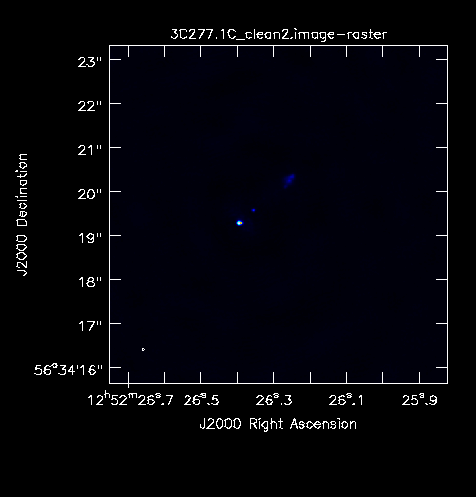

Show log 2018-11-29 13:08:06	INFO	viewer::::	
 2018-11-29 13:08:06	INFO	viewer::::+	##########################################
 2018-11-29 13:08:06	INFO	viewer::::+	##### Begin Task: viewer #####
 2018-11-29 13:08:06	INFO	viewer::::	viewer(infile="3C277.1C_clean2.image",displaytype="raster",channel=0,zoom=1,outfile="viewer_temp.png",
 2018-11-29 13:08:06	INFO	viewer::::+ outscale=1.0,outdpi=300,outformat="png",outlandscape=False,gui=False)
 2018-11-29 13:08:07	INFO	viewer::::	##### End Task: viewer #####
 2018-11-29 13:08:07	INFO	viewer::::+	##########################################

In [41]:
viewer('3C277.1C_clean2.image')

In [42]:
default(imstat)
noise_target = imstat(imagename='3C277.1C_clean2.image',
                    box='20,20,492,120',
                    stokes='I')

rms_target = noise_target['rms'][0]

print rms_target
# 0.000279023422363

0.000278669149447


Show log 2018-11-29 13:08:07	INFO	default:::: ####### Setting values to default for task: imstat #######
 2018-11-29 13:08:07	INFO	imstat::::	
 2018-11-29 13:08:07	INFO	imstat::::+	##########################################
 2018-11-29 13:08:07	INFO	imstat::::+	##### Begin Task: imstat #####
 2018-11-29 13:08:07	INFO	imstat::::	imstat(imagename="3C277.1C_clean2.image",axes=-1,region="",box="20,20,492,120",chans="",
 2018-11-29 13:08:07	INFO	imstat::::+ stokes="I",listit=True,verbose=True,mask="",stretch=False,
 2018-11-29 13:08:07	INFO	imstat::::+ logfile="",append=True,algorithm="classic",fence=-1,center="mean",
 2018-11-29 13:08:07	INFO	imstat::::+ lside=True,zscore=-1,maxiter=-1,clmethod="auto",niter=3)
 2018-11-29 13:08:07	INFO	imstat::CasacRegionManager::fromBCS	Using specified box(es) 20,20,492,120
 2018-11-29 13:08:07	INFO	imstat::image::statistics Determining stats for image 3C277.1C_clean2.image
 2018-11-29 13:08:07	INFO	imstat::ImageRegion::fromRecord	Selected bounding box : 
 2018-11-29 13:08:07	INFO	imstat::ImageRegion::fromRecord+ [20, 20, 0, 0] to [492, 120, 0, 0] (12:52:26.714, +56.34.15.948, I, 4.994e+09Hz to 12:52:25.858, +56.34.17.448, I, 4.994e+09Hz)
 2018-11-29 13:08:07	INFO	imstat::ImageStatsCalculator::_logStartup	Statistics calculated using Classic algorithm
 2018-11-29 13:08:07	INFO	imstat::ImageStatsCalculator::_logStartup	Regions --- 
 2018-11-29 13:08:07	INFO	imstat::ImageStatsCalculator::_logStartup -- bottom-left corner (pixel) [blc]: [20, 20, 0, 0]
 2018-11-29 13:08:07	INFO	imstat::ImageStatsCalculator::_logStartup -- top-right corner (pixel) [trc]: [492, 120, 0, 0]
 2018-11-29 13:08:07	INFO	imstat::ImageStatsCalculator::_logStartup -- bottom-left corner (world) [blcf]: 12:52:26.714, +56.34.15.948, I, 4.994e+09Hz
 2018-11-29 13:08:07	INFO	imstat::ImageStatsCalculator::_logStartup -- top-right corner (world) [trcf]: 12:52:25.858, +56.34.17.448, I, 4.994e+09Hz
 2018-11-29 13:08:07	INFO	imstat::::	Values --- 
 2018-11-29 13:08:07	INFO	imstat:::: -- flux density [flux]: -0.000387356 Jy
 2018-11-29 13:08:07	INFO	imstat:::: -- number of points [npts]: 47773
 2018-11-29 13:08:07	INFO	imstat:::: -- maximum value [max]: 0.00151531 Jy/beam
 2018-11-29 13:08:07	INFO	imstat:::: -- minimum value [min]: -0.000987409 Jy/beam
 2018-11-29 13:08:07	INFO	imstat:::: -- position of max value (pixel) [maxpos]: [327, 65, 0, 0]
 2018-11-29 13:08:07	INFO	imstat:::: -- position of min value (pixel) [minpos]: [281, 99, 0, 0]
 2018-11-29 13:08:07	INFO	imstat:::: -- position of max value (world) [maxposf]: 12:52:26.157, +56.34.16.623, I, 4.994e+09Hz
 2018-11-29 13:08:07	INFO	imstat:::: -- position of min value (world) [minposf]: 12:52:26.241, +56.34.17.133, I, 4.994e+09Hz
 2018-11-29 13:08:07	INFO	imstat:::: -- Sum of pixel values [sum]: -0.00606299 Jy/beam
 2018-11-29 13:08:07	INFO	imstat:::: -- Sum of squared pixel values [sumsq]: 0.00370988 Jy/beam.Jy/beam
 2018-11-29 13:08:07	INFO	imstat::::	Statistics --- 
 2018-11-29 13:08:07	INFO	imstat:::: -- Mean of the pixel values [mean]: -1.26913e-07 Jy/beam
 2018-11-29 13:08:07	INFO	imstat:::: -- Variance of the pixel values : 7.76581e-08 Jy/beam
 2018-11-29 13:08:07	INFO	imstat:::: -- Standard deviation of the Mean [sigma]: 0.000278672 Jy/beam
 2018-11-29 13:08:07	INFO	imstat:::: -- Root mean square [rms]: 0.000278669 Jy/beam
 2018-11-29 13:08:07	INFO	imstat:::: -- Median of the pixel values [median]: 4.23219e-06 Jy/beam
 2018-11-29 13:08:07	INFO	imstat:::: -- Median of the deviations [medabsdevmed]: 0.000191619 Jy/beam
 2018-11-29 13:08:07	INFO	imstat:::: -- IQR [quartile]: 0.000383494 Jy/beam
 2018-11-29 13:08:07	INFO	imstat:::: -- First quartile [q1]: -0.00019332 Jy/beam
 2018-11-29 13:08:07	INFO	imstat:::: -- Third quartile [q3]: 0.000190174 Jy/beam
 2018-11-29 13:08:07	INFO	imstat::ImageStatsCalculator::statistics	Sum column unit = Jy/beam
 2018-11-29 13:08:07	INFO	imstat::ImageStatsCalculator::statistics+	Mean column unit = Jy/beam
 2018-11-29 13:08:07	INFO	imstat::ImageSt

In this example we go straight to amplitude self-calibration. If the previous phase solutions showed large changes you might do more phase-only calibration first to improve the model, perhaps trying shorter solution intervals and different boxes. Gaincal only works from the original, not corrected data so apply the previous phase self-cal solutions as the gaintable in gaincal. 

In [43]:
default(gaincal)
gaincal(vis = '3C277.1C.split.ms',
    caltable = prefix+'_self2.ampcal',
    field = '3C277.1',
    refant = '5',
    minsnr = 1,
    calmode = 'ap',
    minblperant = 4,
    solint = '3min',
    gaintable = prefix+'_self1.phcal',
    parang =  True)

Show log 2018-11-29 13:08:07	INFO	default:::: ####### Setting values to default for task: gaincal #######
 2018-11-29 13:08:07	INFO	gaincal::::	
 2018-11-29 13:08:07	INFO	gaincal::::+	##########################################
 2018-11-29 13:08:07	INFO	gaincal::::+	##### Begin Task: gaincal #####
 2018-11-29 13:08:07	INFO	gaincal::::	gaincal(vis="3C277.1C.split.ms",caltable="3C277.1C_self2.ampcal",field="3C277.1",spw="",intent="",
 2018-11-29 13:08:07	INFO	gaincal::::+ selectdata=True,timerange="",uvrange="",antenna="",scan="",
 2018-11-29 13:08:07	INFO	gaincal::::+ observation="",msselect="",solint="3min",combine="",preavg=-1.0,
 2018-11-29 13:08:07	INFO	gaincal::::+ refant="5",refantmode="flex",minblperant=4,minsnr=1,solnorm=False,
 2018-11-29 13:08:07	INFO	gaincal::::+ gaintype="G",smodel=[],calmode="ap",append=False,splinetime=3600.0,
 2018-11-29 13:08:07	INFO	gaincal::::+ npointaver=3,phasewrap=180.0,docallib=False,callib="",gaintable="3C277.1C_self1.phcal",
 2018-11-29 13:08:07	INFO	gaincal::::+ gainfield=[''],interp=[],spwmap=[],parang=True)
 2018-11-29 13:08:07	INFO	gaincal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2018-11-29 13:08:07	INFO	gaincal::calibrater::open	Opening MS: 3C277.1C.split.ms for calibration.
 2018-11-29 13:08:07	INFO	gaincal::Calibrater::	Initializing nominal selection to the whole MS.
 2018-11-29 13:08:07	INFO	gaincal::::	NB: gaincal automatically excludes auto-correlations.
 2018-11-29 13:08:07	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2018-11-29 13:08:07	INFO	calibrater::reset	Reseting solve/apply state
 2018-11-29 13:08:07	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2018-11-29 13:08:07	INFO	Calibrater::selectvis+ Selecting on field: '3C277.1'
 2018-11-29 13:08:07	INFO	Calibrater::selectvis+ Selecting with TaQL: 'ANTENNA1!=ANTENNA2'
 2018-11-29 13:08:07	INFO	Calibrater::selectvis	Selection did not drop any rows
 2018-11-29 13:08:07	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2018-11-29 13:08:07	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect='ANTENNA1!=ANTENNA2'
 2018-11-29 13:08:07	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 13:08:07	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 13:08:07	INFO	Calibrater::setapply(type, applypar)	. G Jones: table=3C277.1C_self1.phcal select= interp=linear spwmap=[-1] calWt=true
 2018-11-29 13:08:07	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 13:08:07	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 13:08:07	INFO	Calibrater::setapply(type, applypar)	. P Jones 
 2018-11-29 13:08:07	INFO	calibrater::setsolve	Beginning setsolve--(MSSelection version)-------
 2018-11-29 13:08:07	INFO	Calibrater::setsolve	Arranging to SOLVE:
 2018-11-29 13:08:07	INFO	Calibrater::setsolve	. G Jones: table=3C277.1C_self2.ampcal append=false solint=3min refantmode='flex' refant='5' minsnr=1 apmode=AP solnorm=false
 2018-11-29 13:08:07	INFO	calibrater::solve	Beginning solve-----------------------------
 2018-11-29 13:08:07	INFO	Calibrater::solve	The following calibration terms are arranged for apply:
 2018-11-29 13:08:07	INFO	Calibrater::solve	. G Jones: table=3C277.1C_self1.phcal select= interp=linear spwmap=[-1] calWt=true
 2018-11-29 13:08:07	INFO	Calibrater::solve	. P Jones 
 2018-11-29 13:08:07	INFO	Calibrater::solve	The following calibration term is arranged for solve:
 2018-11-29 13:08:07	INFO	Calibrater::solve	. G Jones: table=3C277.1C_self2.ampcal append=false solint=3min refantmode='flex' refant='5' minsnr=1 apmode=AP solnorm=false
 2018-11-29 13:08:07	INFO	ChannelAverageTVI::parseConfiguration	Channel bin is [-1]
 2018-11-29 13:08:07	INFO	Calibrater::solve	For solint = 3min, found 222 solution intervals.
 2018-11-29 13:14:27	INFO	Calibrater::solve Found good G Jones solutio

 Inspect the solutions. The amplitude corrections should be within a few percent of unity. Plot the phase corrections as well, these should be very small residuals. 

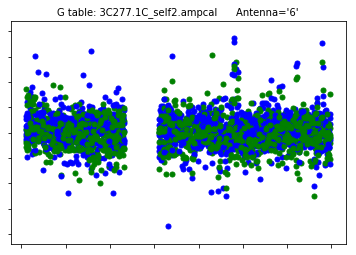

Show log 2018-11-29 13:14:29	INFO	plotcal::::	
 2018-11-29 13:14:29	INFO	plotcal::::+	##########################################
 2018-11-29 13:14:29	INFO	plotcal::::+	##### Begin Task: plotcal #####
 2018-11-29 13:14:29	INFO	plotcal::::	plotcal(caltable="3C277.1C_self2.ampcal",xaxis="time",yaxis="amp",poln="",field="",
 2018-11-29 13:14:29	INFO	plotcal::::+ antenna="",spw="",timerange="",subplot=611,overplot=False,
 2018-11-29 13:14:29	INFO	plotcal::::+ clearpanel="Auto",iteration="antenna",plotrange=[-1, -1, 0.8, 1.2],showflags=False,plotsymbol="o",
 2018-11-29 13:14:29	INFO	plotcal::::+ plotcolor="blue",markersize=5.0,fontsize=10.0,showgui=True,figfile="3C277.1C_self2.ampcal.png")
 2018-11-29 13:14:29	INFO	tableplot::setgui	Switching to GUI mode. All current plots will be reset.
 2018-11-29 13:14:29	INFO	plotcal::createCalTab Detected a NewCalTable!
 2018-11-29 13:14:29	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 13:14:29	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 13:14:29	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 13:14:29	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 13:14:29	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 13:14:29	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 13:14:29	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 13:14:29	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 13:14:29	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 13:14:29	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 13:14:29	INFO	FlagVersion::saveFlagVersion	Now get the data
 2018-11-29 13:14:29	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2018-11-29 13:14:29	INFO	FlagVersion::saveFlagVersion	Saving plot to file 3C277.1C_self2.ampcal.png
 2018-11-29 13:14:29	INFO	plotcal::::	##### End Task: plotcal #####
 2018-11-29 13:14:29	INFO	plotcal::::+	##########################################

In [44]:
plotcal(caltable=prefix+'_self2.ampcal',
    xaxis='time',
    yaxis='amp',
    subplot=611,
    iteration='antenna',
    plotrange = [-1, -1, 0.8, 1.2],
    figfile = '3C277.1C_self2.ampcal.png')

 Apply both 'p' and 'ap' calibration tables with applycal 

In [45]:
applycal(vis = '3C277.1C.split.ms',
    gaintable = [prefix+'_self1.phcal', prefix+'_self2.ampcal'],
    field = '3C277.1',
    parang = True, 
    calwt = False)

Show log 2018-11-29 13:14:29	INFO	applycal::::	
 2018-11-29 13:14:29	INFO	applycal::::+	##########################################
 2018-11-29 13:14:29	INFO	applycal::::+	##### Begin Task: applycal #####
 2018-11-29 13:14:29	INFO	applycal::::	applycal(vis="3C277.1C.split.ms",field="3C277.1",spw="",intent="",selectdata=True,
 2018-11-29 13:14:29	INFO	applycal::::+ timerange="",uvrange="",antenna="",scan="",observation="",
 2018-11-29 13:14:29	INFO	applycal::::+ msselect="",docallib=False,callib="",gaintable=['3C277.1C_self1.phcal', '3C277.1C_self2.ampcal'],gainfield=[],
 2018-11-29 13:14:29	INFO	applycal::::+ interp=[],spwmap=[],calwt=False,parang=True,applymode="",
 2018-11-29 13:14:29	INFO	applycal::::+ flagbackup=True)
 2018-11-29 13:14:29	INFO	applycal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2018-11-29 13:14:29	INFO	applycal::calibrater::open	Opening MS: 3C277.1C.split.ms for calibration.
 2018-11-29 13:14:29	INFO	applycal::Calibrater::	Initializing nominal selection to the whole MS.
 2018-11-29 13:14:29	INFO	applycal::AgentFlagger::open	Table type is Measurement Set
 2018-11-29 13:14:29	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called applycal_2
 2018-11-29 13:14:29	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2018-11-29 13:14:29	INFO	calibrater::reset	Reseting solve/apply state
 2018-11-29 13:14:29	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2018-11-29 13:14:29	INFO	Calibrater::selectvis+ Selecting on field: '3C277.1'
 2018-11-29 13:14:29	INFO	Calibrater::selectvis	Selection did not drop any rows
 2018-11-29 13:14:29	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2018-11-29 13:14:29	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect=''
 2018-11-29 13:14:29	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 13:14:29	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 13:14:29	INFO	Calibrater::setapply(type, applypar)	. G Jones: table=3C277.1C_self1.phcal select= interp=linear spwmap=[-1] calWt=false
 2018-11-29 13:14:29	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 13:14:29	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 13:14:29	INFO	Calibrater::setapply(type, applypar)	. G Jones: table=3C277.1C_self2.ampcal select= interp=linear spwmap=[-1] calWt=false
 2018-11-29 13:14:29	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2018-11-29 13:14:30	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2018-11-29 13:14:30	INFO	Calibrater::setapply(type, applypar)	. P Jones 
 2018-11-29 13:14:30	INFO	calibrater::correct	Beginning correct---------------------------
 2018-11-29 13:14:30	INFO	Calibrater::correct2 (VI2/VB2)	The following calibration terms are arranged for apply:
 2018-11-29 13:14:30	INFO	Calibrater::correct2 (VI2/VB2)	. G Jones: table=3C277.1C_self1.phcal select= interp=linear spwmap=[-1] calWt=false
 2018-11-29 13:14:30	INFO	Calibrater::correct2 (VI2/VB2)	. G Jones: table=3C277.1C_self2.ampcal select= interp=linear spwmap=[-1] calWt=false
 2018-11-29 13:14:30	INFO	Calibrater::correct2 (VI2/VB2)	. P Jones 
 2018-11-29 13:14:32	INFO	calibrater::correct	Finished correcting.
 2018-11-29 13:14:32	INFO	applycal::::	Calibration apply flagging statistics (among calibrateable spws):
 2018-11-29 13:14:32	INFO	applycal:::: Total selected visibilities (among calibrateable spws) = 243660
 2018-11-29 13:14:32	INFO	applycal:::: Flags:
 2018-11-29 13:14:32	INFO	applycal:::: G Jones: In: 2180 (0.894689321185%) --> Out: 2180 (0.894689321185%) (3C277.1C_self1.phcal)
 2018-11-29 13:14:32	INFO	applycal:::: G Jones: In: 2180 (0.894689321185%) --> Out: 2260 (0.927521956825%) (3C277.1C_self2.ampcal)
 2018-11-29 13:14:32	INFO	applycal:::: P Jones: In: 2260 (0.927521956825%) --> Out: 2260 (0.927521956

 Finally, clean in full polarization. Remember that you can change the threshold or the number of iterations/cycles interactively. If you made a new file of saved clean boxes, update the name of the mask file. 

In [46]:
# execfile('3C277.1.clean2.saved')

clean(vis = '3C277.1C.split.ms',
    field = '3C277.1',
    imagename = '3C277.1C_clean3',
    cell = ['0.015arcsec', '0.015arcsec'],
    imsize = [512,512],
    psfmode = 'hogbom',
    imagermode = 'csclean',
    cyclefactor = 4,
    stokes='IQUV',
#    interactive = True,
    niter = 5000,
    gain = 0.05,
    threshold=str(rms_target)+'Jy')
#    mask = 'clean1.rgn')

saveinputs ('clean', '3C277.1.clean3.saved')

Show log 2018-11-29 13:14:35	INFO	clean::::	
 2018-11-29 13:14:35	INFO	clean::::+	##########################################
 2018-11-29 13:14:35	INFO	clean::::+	##### Begin Task: clean #####
 2018-11-29 13:14:35	INFO	clean::::	clean(vis="3C277.1C.split.ms",imagename="3C277.1C_clean3",outlierfile="",field="3C277.1",spw="",
 2018-11-29 13:14:35	INFO	clean::::+ selectdata=True,timerange="",uvrange="",antenna="",scan="",
 2018-11-29 13:14:35	INFO	clean::::+ observation="",intent="",mode="mfs",resmooth=False,gridmode="",
 2018-11-29 13:14:35	INFO	clean::::+ wprojplanes=-1,facets=1,cfcache="cfcache.dir",rotpainc=5.0,painc=360.0,
 2018-11-29 13:14:35	INFO	clean::::+ aterm=True,psterm=False,mterm=True,wbawp=False,conjbeams=True,
 2018-11-29 13:14:35	INFO	clean::::+ epjtable="",interpolation="linear",niter=5000,gain=0.05,threshold="0.000278669149447Jy",
 2018-11-29 13:14:35	INFO	clean::::+ psfmode="hogbom",imagermode="csclean",ftmachine="mosaic",mosweight=False,scaletype="SAULT",
 2018-11-29 13:14:35	INFO	clean::::+ multiscale=[0],negcomponent=-1,smallscalebias=0.6,interactive=False,mask=[],
 2018-11-29 13:14:35	INFO	clean::::+ nchan=-1,start=0,width=1,outframe="",veltype="radio",
 2018-11-29 13:14:35	INFO	clean::::+ imsize=[512, 512],cell=['0.015arcsec', '0.015arcsec'],phasecenter="",restfreq="",stokes="IQUV",
 2018-11-29 13:14:35	INFO	clean::::+ weighting="natural",robust=0.0,uvtaper=False,outertaper=[''],innertaper=['1.0'],
 2018-11-29 13:14:35	INFO	clean::::+ modelimage="",restoringbeam=[''],pbcor=False,minpb=0.2,usescratch=False,
 2018-11-29 13:14:35	INFO	clean::::+ noise="1.0Jy",npixels=0,npercycle=100,cyclefactor=4,cyclespeedup=-1,
 2018-11-29 13:14:35	INFO	clean::::+ nterms=1,reffreq="",chaniter=False,flatnoise=True,allowchunk=False)
 2018-11-29 13:14:35	INFO	clean::::	nchan=-1 start=0 width=1
 2018-11-29 13:14:35	INFO	clean::::	Use default channelization for clean
 2018-11-29 13:14:35	INFO	clean::::	clean image: 3C277.1C_clean3
 2018-11-29 13:14:35	INFO	clean::::	FTMachine used is ft 
 2018-11-29 13:14:35	INFO	imager::setDataOnThisMS()	Performing selection on MeasurementSet : /scratch/condor_pool/condor/dir_199603/EDPNDmB3amtnCshSmpWEHpUqhcrQCoABFKDmT8zPDmABFKDmjCflRn/DIRAC_jIMCJbpilot/13840681/data/3C277.1C.split.ms
 2018-11-29 13:14:35	INFO	imager::setDataOnThisMS()	Selecting on fields : 0
 2018-11-29 13:14:35	INFO	imager::setDataOnThisMS()	Selecting on spectral windows expression :*
 2018-11-29 13:14:35	INFO	imager::setDataOnThisMS()	Selected all 60915 rows
 2018-11-29 13:14:35	INFO	imager::setDataOnThisMS()	Selected : [1 chans in spw 0]
 2018-11-29 13:14:35	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on 3C277.1C.split.ms...
 2018-11-29 13:14:35	INFO	imager::defineimage()	Defining image properties:nx=512 ny=512 cellx='0.015arcsec' celly='0.015arcsec' stokes=IQUV' mode=MFS nchan=-1 start=0 step=1 spwids=[-1] fieldid=-1 facets=1 frame=5 distance='0'
 2018-11-29 13:14:35	INFO	imager::defineimage() phaseCenter='12:52:26.29, 56.34.19.49, ' mStart='Radialvelocity: 0' qStep='0 '' mFreqStart='Frequency: 0
 2018-11-29 13:14:36	INFO	Imager::setvp() Setting voltage pattern parameters
 2018-11-29 13:14:36	INFO	Imager::setvp() Sky position tolerance is 180 degrees
 2018-11-29 13:14:36	INFO	Imager::setvp() Using system default voltage patterns for each telescope
 2018-11-29 13:14:36	INFO	imager::makeimage() Calculating image (without full skyequation)
 2018-11-29 13:14:37	INFO	PBMath::initByDiameter PBMath init to Airy scaled to diameter = 25
 2018-11-29 13:14:39	INFO	Imager::setvp() Setting voltage pattern parameters
 2018-11-29 13:14:39	INFO	imager::weight()	Weighting MS: Imaging weights will be changed
 2018-11-29 13:14:39	INFO	imager::weight()	Natural weighting
 2018-11-29 13:14:39	INFO	clean::::	Used mask(s) : [''] to create mask image(s) : 3C277.1C_clean3.mask
 2018-11-29 13:14:39	INFO	imager::setoptions() Setting processing options
 2018-11-29 13:14:39	INFO	clean::::	No model found. Making empty initial m

You can use Display Panel options to view all 4 Stokes planes at once. In these settings, the mask is applied to all planes and imagermode='csclean' deconvolved them jointly, which is usually appropriate for small fractional polarization. View and check that the noise has gone down: 

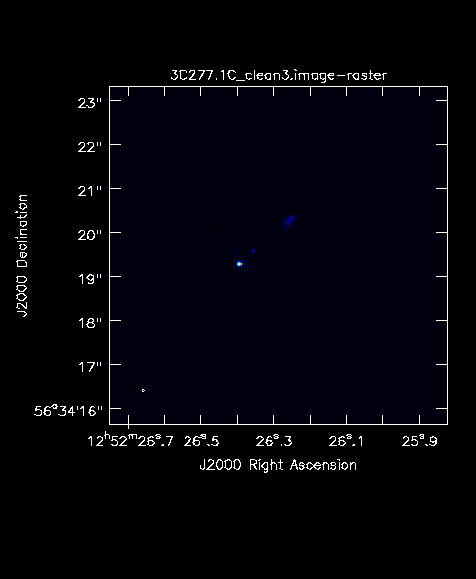

Show log 2018-11-29 13:17:09	INFO	viewer::::	
 2018-11-29 13:17:09	INFO	viewer::::+	##########################################
 2018-11-29 13:17:09	INFO	viewer::::+	##### Begin Task: viewer #####
 2018-11-29 13:17:09	INFO	viewer::::	viewer(infile="3C277.1C_clean3.image",displaytype="raster",channel=0,zoom=1,outfile="viewer_temp.png",
 2018-11-29 13:17:09	INFO	viewer::::+ outscale=1.0,outdpi=300,outformat="png",outlandscape=False,gui=False)
 2018-11-29 13:17:09	INFO	viewer::::	##### End Task: viewer #####
 2018-11-29 13:17:09	INFO	viewer::::+	##########################################

In [47]:
viewer('3C277.1C_clean3.image')

In [48]:
default(imstat)
noise_target = imstat(imagename = '3C277.1C_clean3.image',
                box = '20,20,492,120',
                stokes = 'I')

rms_target=noise_target['rms'][0]

print rms_target
# 0.000105255082105

0.000105286574317


Show log 2018-11-29 13:17:09	INFO	default:::: ####### Setting values to default for task: imstat #######
 2018-11-29 13:17:09	INFO	imstat::::	
 2018-11-29 13:17:09	INFO	imstat::::+	##########################################
 2018-11-29 13:17:09	INFO	imstat::::+	##### Begin Task: imstat #####
 2018-11-29 13:17:09	INFO	imstat::::	imstat(imagename="3C277.1C_clean3.image",axes=-1,region="",box="20,20,492,120",chans="",
 2018-11-29 13:17:09	INFO	imstat::::+ stokes="I",listit=True,verbose=True,mask="",stretch=False,
 2018-11-29 13:17:09	INFO	imstat::::+ logfile="",append=True,algorithm="classic",fence=-1,center="mean",
 2018-11-29 13:17:09	INFO	imstat::::+ lside=True,zscore=-1,maxiter=-1,clmethod="auto",niter=3)
 2018-11-29 13:17:09	INFO	imstat::CasacRegionManager::fromBCS	Using specified box(es) 20,20,492,120
 2018-11-29 13:17:09	INFO	imstat::image::statistics Determining stats for image 3C277.1C_clean3.image
 2018-11-29 13:17:09	INFO	imstat::ImageRegion::fromRecord	Selected bounding box : 
 2018-11-29 13:17:09	INFO	imstat::ImageRegion::fromRecord+ [20, 20, 0, 0] to [492, 120, 0, 0] (12:52:26.714, +56.34.15.948, I, 4.994e+09Hz to 12:52:25.858, +56.34.17.448, I, 4.994e+09Hz)
 2018-11-29 13:17:09	INFO	imstat::ImageStatsCalculator::_logStartup	Statistics calculated using Classic algorithm
 2018-11-29 13:17:09	INFO	imstat::ImageStatsCalculator::_logStartup	Regions --- 
 2018-11-29 13:17:09	INFO	imstat::ImageStatsCalculator::_logStartup -- bottom-left corner (pixel) [blc]: [20, 20, 0, 0]
 2018-11-29 13:17:09	INFO	imstat::ImageStatsCalculator::_logStartup -- top-right corner (pixel) [trc]: [492, 120, 0, 0]
 2018-11-29 13:17:09	INFO	imstat::ImageStatsCalculator::_logStartup -- bottom-left corner (world) [blcf]: 12:52:26.714, +56.34.15.948, I, 4.994e+09Hz
 2018-11-29 13:17:09	INFO	imstat::ImageStatsCalculator::_logStartup -- top-right corner (world) [trcf]: 12:52:25.858, +56.34.17.448, I, 4.994e+09Hz
 2018-11-29 13:17:09	INFO	imstat::::	Values --- 
 2018-11-29 13:17:09	INFO	imstat:::: -- flux density [flux]: -0.000578849 Jy
 2018-11-29 13:17:09	INFO	imstat:::: -- number of points [npts]: 47773
 2018-11-29 13:17:09	INFO	imstat:::: -- maximum value [max]: 0.000779133 Jy/beam
 2018-11-29 13:17:09	INFO	imstat:::: -- minimum value [min]: -0.000509934 Jy/beam
 2018-11-29 13:17:09	INFO	imstat:::: -- position of max value (pixel) [maxpos]: [328, 65, 0, 0]
 2018-11-29 13:17:09	INFO	imstat:::: -- position of min value (pixel) [minpos]: [252, 95, 0, 0]
 2018-11-29 13:17:09	INFO	imstat:::: -- position of max value (world) [maxposf]: 12:52:26.155, +56.34.16.623, I, 4.994e+09Hz
 2018-11-29 13:17:09	INFO	imstat:::: -- position of min value (world) [minposf]: 12:52:26.293, +56.34.17.073, I, 4.994e+09Hz
 2018-11-29 13:17:09	INFO	imstat:::: -- Sum of pixel values [sum]: -0.00906145 Jy/beam
 2018-11-29 13:17:09	INFO	imstat:::: -- Sum of squared pixel values [sumsq]: 0.000529576 Jy/beam.Jy/beam
 2018-11-29 13:17:09	INFO	imstat::::	Statistics --- 
 2018-11-29 13:17:09	INFO	imstat:::: -- Mean of the pixel values [mean]: -1.89677e-07 Jy/beam
 2018-11-29 13:17:09	INFO	imstat:::: -- Variance of the pixel values : 1.10855e-08 Jy/beam
 2018-11-29 13:17:09	INFO	imstat:::: -- Standard deviation of the Mean [sigma]: 0.000105288 Jy/beam
 2018-11-29 13:17:09	INFO	imstat:::: -- Root mean square [rms]: 0.000105287 Jy/beam
 2018-11-29 13:17:09	INFO	imstat:::: -- Median of the pixel values [median]: -1.19048e-06 Jy/beam
 2018-11-29 13:17:09	INFO	imstat:::: -- Median of the deviations [medabsdevmed]: 7.02706e-05 Jy/beam
 2018-11-29 13:17:09	INFO	imstat:::: -- IQR [quartile]: 0.000140499 Jy/beam
 2018-11-29 13:17:09	INFO	imstat:::: -- First quartile [q1]: -7.11453e-05 Jy/beam
 2018-11-29 13:17:09	INFO	imstat:::: -- Third quartile [q3]: 6.93541e-05 Jy/beam
 2018-11-29 13:17:09	INFO	imstat::ImageStatsCalculator::statistics	Sum column unit = Jy/beam
 2018-11-29 13:17:09	INFO	imstat::ImageStatsCalculator::statistics+	Mean column unit = Jy/beam
 2018-11-29 13:17:09	INFO	imstat::Ima

You can check the accuracy of your model by plotting the Fourier transform of the Clean components (in the MODEL data column of the MS) against the CORRECTED visibilities: 

In [49]:
default(plotms)
plotms(vis = '3C277.1C.split.ms',
    xaxis = 'uvdist',
    yaxis = 'amp',
    ydatacolumn = 'corrected',
    selectdata = True,
    correlation = 'LL',
    field = '3C277.1',
    avgtime = '180', # 3 min, same as solution interval
    #plotcolor = 'blue',
    #overplot = True,
    plotfile = '3C277.1.split_FTcc.png',
    expformat = 'png')

False

Show log 2018-11-29 13:17:09	INFO	default:::: ####### Setting values to default for task: plotms #######
 2018-11-29 13:17:10	INFO	plotms::::	
 2018-11-29 13:17:10	INFO	plotms::::+	##########################################
 2018-11-29 13:17:10	INFO	plotms::::+	##### Begin Task: plotms #####
 2018-11-29 13:17:10	INFO	plotms::::	plotms(vis="3C277.1C.split.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2018-11-29 13:17:10	INFO	plotms::::+ plotindex=0,xaxis="uvdist",xdatacolumn="",yaxis="amp",ydatacolumn="corrected",
 2018-11-29 13:17:10	INFO	plotms::::+ yaxislocation="",selectdata=True,field="3C277.1",spw="",timerange="",
 2018-11-29 13:17:10	INFO	plotms::::+ uvrange="",antenna="",scan="",correlation="LL",array="",
 2018-11-29 13:17:10	INFO	plotms::::+ observation="",intent="",feed="",msselect="",averagedata=True,
 2018-11-29 13:17:10	INFO	plotms::::+ avgchannel="",avgtime="180",avgscan=False,avgfield=False,avgbaseline=False,
 2018-11-29 13:17:10	INFO	plotms::::+ avgantenna=False,avgspw=False,scalar=False,transform=True,freqframe="",
 2018-11-29 13:17:10	INFO	plotms::::+ restfreq="",veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,
 2018-11-29 13:17:10	INFO	plotms::::+ extchannel=False,iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,
 2018-11-29 13:17:10	INFO	plotms::::+ ysharedaxis=False,customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",
 2018-11-29 13:17:10	INFO	plotms::::+ symbolfill="fill",symboloutline=False,coloraxis="",customflaggedsymbol=False,flaggedsymbolshape="circle",
 2018-11-29 13:17:10	INFO	plotms::::+ flaggedsymbolsize=2,flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,plotrange=[],
 2018-11-29 13:17:10	INFO	plotms::::+ title="",titlefont=0,xlabel="",xaxisfont=0,ylabel="",
 2018-11-29 13:17:10	INFO	plotms::::+ yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",majorcolor="B0B0B0",
 2018-11-29 13:17:10	INFO	plotms::::+ showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",showlegend=False,
 2018-11-29 13:17:10	INFO	plotms::::+ legendposition="",plotfile="3C277.1.split_FTcc.png",expformat="png",verbose=True,exprange="",
 2018-11-29 13:17:10	INFO	plotms::::+ highres=False,dpi=-1,width=-1,height=-1,overwrite=False,
 2018-11-29 13:17:10	INFO	plotms::::+ showgui=False,clearplots=True,callib=[''],headeritems="",showatm=False,
 2018-11-29 13:17:10	INFO	plotms::::+ showtsky=False)
 2018-11-29 13:17:10	SEVERE	plotms::::	ERROR: DISPLAY environment variable is not set! Cannot run plotms.
 2018-11-29 13:17:10	INFO	plotms::::	##### End Task: plotms #####
 2018-11-29 13:17:10	INFO	plotms::::+	##########################################

In [50]:
plotms(vis = '3C277.1C.split.ms',
    xaxis = 'uvdist',
    yaxis = 'amp',
    ydatacolumn = 'model',
    selectdata = True,
    correlation = 'LL',
    field = '3C277.1',
    avgtime = '180', # 3 min, same as solution interval
    #plotcolor = 'red',
    #overplot = True,
    #plotfile = '3C277.1.split_FTcc.png',
    expformat = 'png')
    
# This was originally done in plotxy but doesn't look like it works in plotms

False

Show log 2018-11-29 13:17:10	INFO	plotms::::	
 2018-11-29 13:17:10	INFO	plotms::::+	##########################################
 2018-11-29 13:17:10	INFO	plotms::::+	##### Begin Task: plotms #####
 2018-11-29 13:17:10	INFO	plotms::::	plotms(vis="3C277.1C.split.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2018-11-29 13:17:10	INFO	plotms::::+ plotindex=0,xaxis="uvdist",xdatacolumn="",yaxis="amp",ydatacolumn="model",
 2018-11-29 13:17:10	INFO	plotms::::+ yaxislocation="",selectdata=True,field="3C277.1",spw="",timerange="",
 2018-11-29 13:17:10	INFO	plotms::::+ uvrange="",antenna="",scan="",correlation="LL",array="",
 2018-11-29 13:17:10	INFO	plotms::::+ observation="",intent="",feed="",msselect="",averagedata=True,
 2018-11-29 13:17:10	INFO	plotms::::+ avgchannel="",avgtime="180",avgscan=False,avgfield=False,avgbaseline=False,
 2018-11-29 13:17:10	INFO	plotms::::+ avgantenna=False,avgspw=False,scalar=False,transform=True,freqframe="",
 2018-11-29 13:17:10	INFO	plotms::::+ restfreq="",veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,
 2018-11-29 13:17:10	INFO	plotms::::+ extchannel=False,iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,
 2018-11-29 13:17:10	INFO	plotms::::+ ysharedaxis=False,customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",
 2018-11-29 13:17:10	INFO	plotms::::+ symbolfill="fill",symboloutline=False,coloraxis="",customflaggedsymbol=False,flaggedsymbolshape="circle",
 2018-11-29 13:17:10	INFO	plotms::::+ flaggedsymbolsize=2,flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,plotrange=[],
 2018-11-29 13:17:10	INFO	plotms::::+ title="",titlefont=0,xlabel="",xaxisfont=0,ylabel="",
 2018-11-29 13:17:10	INFO	plotms::::+ yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",majorcolor="B0B0B0",
 2018-11-29 13:17:10	INFO	plotms::::+ showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",showlegend=False,
 2018-11-29 13:17:10	INFO	plotms::::+ legendposition="",plotfile="plotms_temp.png",expformat="png",verbose=True,exprange="",
 2018-11-29 13:17:10	INFO	plotms::::+ highres=False,dpi=-1,width=-1,height=-1,overwrite=True,
 2018-11-29 13:17:10	INFO	plotms::::+ showgui=False,clearplots=True,callib=[''],headeritems="",showatm=False,
 2018-11-29 13:17:10	INFO	plotms::::+ showtsky=False)
 2018-11-29 13:17:10	SEVERE	plotms::::	ERROR: DISPLAY environment variable is not set! Cannot run plotms.
 2018-11-29 13:17:10	INFO	plotms::::	##### End Task: plotms #####
 2018-11-29 13:17:10	INFO	plotms::::+	##########################################

Target model (red) overplotted on the calibrated visibility data.

Some scatter in the data is due to real structure below the CC cutoff and to unavoidable noise, which is worse on intermediate baselines because these include Defford, the least sensitive antenna at 5 GHz. If the model is a very poor fit, try more editing and/or self-calibration and/or change the clean inputs Split the total intensity Stokes I image out of final image using immath

In [51]:
default(immath)
immath(imagename = '3C277.1C_clean3.image',
    mode = 'evalexpr',
    stokes = 'I',
    outfile = '3C277.1C.icln',
    expr = 'IM0')

True

Show log 2018-11-29 13:17:10	INFO	default:::: ####### Setting values to default for task: immath #######
 2018-11-29 13:17:10	INFO	immath::::	
 2018-11-29 13:17:10	INFO	immath::::+	##########################################
 2018-11-29 13:17:10	INFO	immath::::+	##### Begin Task: immath #####
 2018-11-29 13:17:10	INFO	immath::::	immath(imagename="3C277.1C_clean3.image",mode="evalexpr",outfile="3C277.1C.icln",expr="IM0",varnames="",
 2018-11-29 13:17:10	INFO	immath::::+ sigma="0.0mJy/beam",polithresh="",mask="",region="",box="",
 2018-11-29 13:17:10	INFO	immath::::+ chans="",stokes="I",stretch=False,imagemd="")
 2018-11-29 13:17:10	INFO	CasacRegionManager::fromBCS	No directional region specified. Using full positional plane.
 2018-11-29 13:17:10	INFO	CasacRegionManager::fromBCS	Using all spectral channels.
 2018-11-29 13:17:10	INFO	CasacRegionManager::fromBCS	Using polarizations I
 2018-11-29 13:17:10	INFO	ImageRegion::fromRecord	Selected bounding box : 
 2018-11-29 13:17:10	INFO	ImageRegion::fromRecord+ [0, 0, 0, 0] to [511, 511, 0, 0] (12:52:26.751, +56.34.15.648, I, 4.994e+09Hz to 12:52:25.823, +56.34.23.313, I, 4.994e+09Hz)
 2018-11-29 13:17:10	INFO	ImageRegion::fromRecord	Creating image '_immath_tmp202968_0' of shape [512, 512, 1, 1]
 2018-11-29 13:17:10	INFO	ImageExprCalculator::_imagecalc	Creating image `3C277.1C.icln' of shape [512, 512, 1, 1]
 2018-11-29 13:17:11	INFO	immath::::	##### End Task: immath #####
 2018-11-29 13:17:11	INFO	immath::::+	##########################################

 Use the toolkit to make a Q+iU image (needed to plot scaled polarization vectors) 

In [52]:
# maybe skip this

#potool = casac.homefinder.find_home_by_name('imagepolHome')
#pho = potool.create()
#pho.open('3C277.1C_clean3.image')
#complexlinpolimage = '3C277.1C.cmplxlinpol'
#pho.complexlinpol(complexlinpolimage)
#pho.close()

 Estimate a suitable cutoff for plotting polarization e.g. 

In [53]:
#print 10*rms_target

and then use the menu Data>Load to enter

'3C277.1C.cmplxlinpol'['3C277.1C.icln'> 0.0024] 

in the Load Data LEL expression field, as shown below (change 0.0024 to your value). (DON'T click on anything in the Name list). Click on Vector Map. 

 How to display scaled polarization vectors from the Q+iU image with a cutoff at about 10-20 times the rms of the Stokes I image.

Use Data Display options for the raster and vector images and try adding contours. Compare this with the image made before self-calibration - note that the 3 rms_noise level used as the contour base is now much lower. 

This plot uses x- and y-increments of 2, debiasing true, amplitude scale factor 2, vector color cyan and contours at: [-0.0004 0.0004 0.0008 0.0016 0.0032 0.0064 0.0128] Jy/beam

If time, try to improve the image... More self-calibration, maybe editing, clean more slowly with smaller gain, careful boxing... You could also split out 3C286 and 1300+580 and image these in full polarization as above. There is probably no need for further self calibration of the calibration sources.
Anita Richards 19 June 2010 